*Juan Luis Jurado Esteve*  
*Julia Gómez Concejo*

# Assingment 1

In [2]:
import pandas as pd
import numpy as np

**1. (0.4 points) Explore your data and do a simplified EDA, mainly in order to determine how many
features and how many instances there are, which variables are categorical / numerical, which
features have missing values and how many, whether there are constant columns (that should
be removed), and whether it is a regression or classification problem (energy is the response
variable). You might want to explore other issues you find interesting, but bear in mind that in
this assignment EDA is only 0.4 points.**

In [2]:
wind_ava = pd.read_csv('wind_available.csv.gzip', compression='gzip')
nrows = wind_ava.shape[0]
ncol = wind_ava.shape[1]
print('There are',nrows,'instances and',ncol,'features.')
column_names_df = pd.DataFrame(wind_ava.columns)
print(column_names_df.to_string())

There are 4748 instances and 555 features.
              0
0        energy
1          year
2         month
3           day
4          hour
5     p54.162.1
6     p54.162.2
7     p54.162.3
8     p54.162.4
9     p54.162.5
10    p54.162.6
11    p54.162.7
12    p54.162.8
13    p54.162.9
14   p54.162.10
15   p54.162.11
16   p54.162.12
17   p54.162.13
18   p54.162.14
19   p54.162.15
20   p54.162.16
21   p54.162.17
22   p54.162.18
23   p54.162.19
24   p54.162.20
25   p54.162.21
26   p54.162.22
27   p54.162.23
28   p54.162.24
29   p54.162.25
30    p55.162.1
31    p55.162.2
32    p55.162.3
33    p55.162.4
34    p55.162.5
35    p55.162.6
36    p55.162.7
37    p55.162.8
38    p55.162.9
39   p55.162.10
40   p55.162.11
41   p55.162.12
42   p55.162.13
43   p55.162.14
44   p55.162.15
45   p55.162.16
46   p55.162.17
47   p55.162.18
48   p55.162.19
49   p55.162.20
50   p55.162.21
51   p55.162.22
52   p55.162.23
53   p55.162.24
54   p55.162.25
55       cape.1
56       cape.2
57       cape.3
58       cape

From the vision of the header of the data frame and the attributes names appendix in the instructions, we conclude that the instances contain the following attributes: energy, year, month, day, hour and, at the different 25 locations, all of the following values in this order: p54.162 (Vertical integral of temperature), p55.162 (Vertical integral of water vapour), cape (Convective available potential energy), p59.162 (Vertical integral of divergence of kinetic energy), lai_lv (Leaf area index, low vegetation), lai_hv (Leaf area index, high vegetation), u10n (Neutral wind at 10 m u-component), v10n (Neutral wind at 10 m v-component), sp (Surface pressure), stl1 (Soil temperature level 1), u10 (10 metre U wind component), v10 (10 metre V wind component), t2m (2 metre temperature), stl2 (Soil temperature level 2), stl3 (Soil temperature level 3), iews (Instantaneous eastward turbulent surface stress), inss (Instantaneous northward turbulent surface), stl4 (Soil temperature level 4), fsr (Forecast surface roughness), flsr (Forecast logarithm of surface roughness for heat), u100 (100 metre U wind component) and v100 (100 metre V wind component).

In [3]:
print(wind_ava.head())
print(wind_ava["year"].unique())

    energy  year  month  day  hour     p54.162.1     p54.162.2     p54.162.3  \
0   402.71  2005      1    2    18  2.534970e+06  2.526864e+06  2.518754e+06   
1   696.80  2005      1    3     0           NaN           NaN  2.521184e+06   
2  1591.15  2005      1    3     6  2.533727e+06  2.525703e+06  2.517678e+06   
3  1338.62  2005      1    3    12           NaN  2.526548e+06  2.518609e+06   
4   562.50  2005      1    3    18  2.529543e+06           NaN  2.513702e+06   

      p54.162.4     p54.162.5  ...   v100.16   v100.17   v100.18   v100.19  \
0  2.510648e+06  2.502537e+06  ... -4.683596       NaN -4.407196       NaN   
1  2.513088e+06           NaN  ... -3.397886 -3.257192 -3.115998 -2.975304   
2  2.509654e+06           NaN  ... -1.454105       NaN -1.138290       NaN   
3  2.510670e+06  2.502732e+06  ...  1.255015  1.370265  1.485515  1.600765   
4  2.505782e+06  2.497861e+06  ...  1.939031       NaN       NaN  2.193977   

    v100.20   v100.21   v100.22   v100.23   v100.2

Note that, since the instances are ordered chronologically, we cannot shuffle data when carrying out the partition for evaluation. For this reason, we will use time intervals of 1 year to make partitions, as we will explain later.

In [3]:
if all(pd.api.types.is_numeric_dtype(dtype) for dtype in wind_ava.dtypes):
    print('All of the columns contain numerical data.')
else:
    print('Not all columns are numerical.')

All of the columns contain numerical data.


From an analysis of the type of the data we have concluded that all the data are numerical.

In [4]:
missing_values_count = wind_ava.isnull().sum()

# Filering the columns with at least one na
missing_values_columns = missing_values_count[missing_values_count > 0]

# Printing the features with na and the number of na
print(missing_values_columns)

p54.162.1    372
p54.162.2    461
p54.162.3    263
p54.162.4    314
p54.162.5    489
            ... 
v100.21      261
v100.22      387
v100.23      569
v100.24      579
v100.25      436
Length: 550, dtype: int64


Since the number of the columns with missing values is 550, starting with p54.162.1, and the data frame contains 555 columns, we conclude that all the attributes except for energy, year, month, day and hour contain missing values. This is a high number of attributes with missing values, but it is not concerning, since it is a plausible issue to happen in real life measures. In fact, it is reassuring that the dates at which the measures were taken are correctly recorded in the dataset, and also the energy produced, which is the key attribute to our study.

In [5]:
mean_na=np.mean(missing_values_count[missing_values_count > 0])
median_na=np.median(missing_values_count[missing_values_count > 0])
max_na=max(missing_values_count)
columns_with_max_na = missing_values_count[missing_values_count == max_na]
max_na_dict = columns_with_max_na.to_dict()
print('Median:',np.round(median_na,1),'na. Mean:',np.round(mean_na,1),
      'na. Column with the maximum number of na:',max_na_dict,'na.')
median_na_prop=median_na/nrows*100
mean_na_prop=mean_na/nrows*100
max_na_dict[list(max_na_dict.keys())[0]] = np.round(max_na/nrows*100,1)
print('Median proportion of na:',np.round(median_na_prop,1),'%. Mean proportion of na:',
      np.round(mean_na_prop,1),'%.')
print('Column with the maximum number of na:',max_na_dict,'%.')

Median: 587.5 na. Mean: 593.0 na. Column with the maximum number of na: {'lai_hv.13': 964} na.
Median proportion of na: 12.4 %. Mean proportion of na: 12.5 %.
Column with the maximum number of na: {'lai_hv.13': 20.3} %.


From this analysis, we have concluded that the median and the mean of columns containing NA (among the columns that contain NA) are very similar, having values of 587.5 and 593.0. The column 'lai_hv.13' (Leaf area index, high vegetation in location 13) contains the maximum number of na, 964, which is very high and constitutes more than 3/2 of the mean. In order to analize whether this number of na is significant or not, we have compared it with the number of rows, obtaining that the mean percentage of missing values (in each parameter that contains missing values) is 12.5%, and a median percentage of 12.4%. This number of NA is not high enough to discard any parameters, even the highest percentage of NA associated with the parameter 'lai_hv.13' is 20.3%, which is still plausible for an experimental measurement.

Some brief research in Leaf area index reveals that traditionally, researchers measured leaf area index by harvesting all the leaves from a plot and painstakingly measuring the area of each leaf. Modern equipment like flatbed scanners have made this process more efficient, but it is still labor intensive, time consuming, and destructive. This is explanatory for the high lack of data regarding this parameter in location 13. In particular, we have studied the 'lai_hv' columns, to see if many of them fall above the mean regarding the number of na:

In [6]:
columns_lai_hv_na= missing_values_count.filter(regex='lai_hv')[missing_values_count>mean_na]
print('Proportion of locations with a number of missing values above the mean regarding the parameter lai_hv:',len(columns_lai_hv_na)/25)

Proportion of locations with a number of missing values above the mean regarding the parameter lai_hv: 0.6


As expected, the 'lai_hv' parameter falls above the mean of missing values in 60% of the locations.

In [7]:
locations_na = []
for i in range(1, 26):
    regex_pattern = f'\\.{i}$'  
    locations_na.append(np.mean(missing_values_count.filter(regex=regex_pattern)))

print('The location with the maximum number of na is location',np.argmax(locations_na) + 1,
      ', with',np.round(max(locations_na),1),'na.') 

The location with the maximum number of na is location 3 , with 703.8 na.


According to our computations, location 3 has on average the most missing values of all locations taking into account all of the parameters.

In [8]:
nan_count_per_row = wind_ava.isna().sum(axis=1)
if all(nan_count_per_row > 0)==True:
  print('All of the instances have NA.')

All of the instances have NA.


This result is quite revealing, since it forces to use missing value imputation when required.

In [9]:
na_count_per_row = wind_ava.isna().sum(axis=1)
max_na_row_index = na_count_per_row.idxmax()

print(f"The instance with most NA is the row of index {max_na_row_index}, having {max(na_count_per_row)} NA.")

The instance with most NA is the row of index 3946, having 97 NA.


We have also determined that the instance with most NA has 97 NA, but that is still not enough to discard that instance, since there are 550 features in total.

Now, we will analize the object of study: the energy feature, by computing its meand and standard deviation:

In [10]:
energy_sd=np.std(wind_ava['energy'])
energy_mean=np.mean(wind_ava['energy'])
print('The energy mean is',np.round(energy_mean,1),'and its standard deviation is',np.round(energy_sd,1),'.')

The energy mean is 693.1 and its standard deviation is 665.5 .


In [11]:
constant_columns = [col for col in wind_ava.columns if wind_ava[col].nunique() == 1]
if constant_columns:
    print("Number of constant columns:", constant_columns)
else:
    print("There are no constant columns in our DataFrame.")

There are no constant columns in our DataFrame.


In addition, we have determined that there are no constant columns in our data frame. Finally, we have also theorically determined that this is a case of regression (and not of classification), since the data that we have to predict are of type numerical and not categorical, and the aim is to find a function that transforms the input into the output.

Finally, we will split the data into two dataframes: X (containing the attributes used for the models) and y (containing only the output variable). This will ease up the code for the rest of the assignment.

In [12]:
y = wind_ava.iloc[:, 0]  #output variable (labels)
X = wind_ava.iloc[:, 5:]  #attributes

**2. (0.3 points) Decide how you are going to carry out the outer evaluation (estimation of future
performance) and the inner evaluation for comparing different alternatives. Decide which
metric you are going to use. Provide justifications.**

We have decided to carry out nested crossvalidation in order to reduce the bias in model evaluation and optimization that comes with holdout validation. Therefore, we will use 5-fold crossvalidation for the estimation of future performance and 4-fold crossvalidation for hyperparameter tuning.

The reason for choosing these particular partitions is the following: On the one hand, the dataset is quite large and therefore $\frac{1}{5}$ of the dataset is more than enough to test performance. This leaves $\frac{4}{5}$ of the data to train the model.
However, on the other hand, the CASH problem is very computationally expensive, specially when performing nested crossvalidation. By reducing the number of folds we ensure that we reduce the bias while making the training less computationally heavy.

In addition to all this, we have chosen the partitions so that each fold contains a whole year. This is due to the nature of the different months and seasons of the year. If we took partitions of 6 months (as an example), we would find that the meteorological parameters in these partitions are not that similar, as we may find that summer is hotter or winter in windier. By choosing whole years, we ensure that the different partitions do not have this type of bias.

Regarding the evaluation and comparison of the models, we have decided to use the Root Mean Squared Error. Since this data is used to estimate the energy produced in a given region, we think it is crucial that the error is interpretable, in order to ease the selection of margins of error for the client. The client might want to hire some other company to provide the rest of the energy that renewable energy cannot. Thus, it would be very interesting to know the average error in the same units as the output variable.

In addition, outliers have a greater impact on the model, since these are the points at risk of falling out od the mentioned error margin. This means it is much worse to be off by 10 units than by 5, not only twice as worse. For this reason we will use RMSE over MAE.


In [4]:
def RMSE(pred, test):
    return np.sqrt(np.mean((pred - test)**2))

**3. (4.7 points) Main body of the assignment. The Sotavento company wants you to get some
conclusions about the following issues. In order to come up with a conclusion, you will need to
experiment with different alternatives and compare them with the inner evaluation.**

**a. (0.3 points) The following issues need not be dealt with in that order, nor be
systematic. Please, provide an initial plan about the order in which you are going to
explore these issues (although you can change your plan later).**

We will now provide a brief outline of the following sections. Further explanation about each one can be found in the corresponding section.

1. Fisrt of all we will study whether all the variables are necessary in for the training of our model. Here there are two key issues to tackle. Using the data only at Sotavento or at the 25 locations provided, and selecting whether every of the 22 attributes provided for each location is useful.

2. Next, we will proceed to the imputation of missing values. We will test several methods to determine which yield better results (the details will be showcased in the corresponding section).

3. In the third place, we will proceed to the analysis of the CASH problem. We will train 4 different machine learning algorithms and compare their predictions to select the best possible model among them.

4. Then, we will explore the effect of introducing Stacking into the analysis. Using the 4 previously trained models, we will build a meta model and compare it with the best model obtained in the previous section, to verify whether stacking improves the predictions.

5. Finally, we will write a small report on how ChatGPT was used during the assignment and what advantages and disadvantages it brought.



**c. (0.3 points) Are all the 550 attributes really necessary? Maybe only the attributes related to the Sotavento location (13th location in the grid) are actually required? Or only the attributes related to wind? (you are not expected to use automatic feature selection techniques here, rather, select features by hand)**

Regarding the attributes relating to each of the 25 locations, we have decided to leave all of them in. Since neither of us have expertise in renewable energy production, we do not feel comfortable in selecting features by hand without prior testing.

About whether to keep data from all 25 locations, we will train 2 regression trees, one using only the 22 variables for the Sotavento location and another using all the variables. Then, we will compare the results and decide if the data from the different locations help with prediction.

Since the goal of this section is a simple comparison, we have chosen decision trees because they are faster to train compared with other models. Given that scikit-learn cannot handle missing values in decision trees, we will impute the missing values by the mean of each column.

In this same line, we have decided to use holdout validation for the outer evaluation and 4-fold crossvalidation for the inner evaluation, using random search for HPT.
This split means that we will take all data in years 2005-2008 for training and year 2009 for testing.


In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

## Outer evaluation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =1/5,
                                    shuffle = False)

## Inner evaluation split
inner = KFold(n_splits = 4, shuffle = False)

## Impute missing values
imputer = SimpleImputer(strategy = 'mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.fit_transform(X_test)

## Set the grid of hyperparameters
param_tree = {
    "max_depth": range(5, 26, 2),
    "min_samples_split": [2, 10, 14, 20, 30,] }

## Initialize the model
tree_reg = DecisionTreeRegressor(random_state = 100512068)

## Model with all 25 locations ##
rand_search_tree = RandomizedSearchCV(tree_reg, n_iter = 10,
                                  cv = inner, param_distributions = param_tree,
                                  scoring = "neg_root_mean_squared_error",
                                  random_state = 100512068)

rand_search_tree.fit(X_train_imp, y_train)
test_predictions_25 = rand_search_tree.predict(X_test_imp)
test_RMSE_25 = RMSE(test_predictions_25, y_test)

## Model for Sotavento ##

X_train_sot = X_train_imp[:,12*22:13*22-1]
X_test_sot = X_test_imp[:,12*22:13*22-1]

rand_search_tree = RandomizedSearchCV(tree_reg, n_iter = 10,
                                  cv = inner, param_distributions = param_tree,
                                  scoring = "neg_root_mean_squared_error",
                                  random_state = 100512068)

rand_search_tree.fit(X_train_sot, y_train)
test_predictions_sot = rand_search_tree.predict(X_test_sot)
test_RMSE_sot = RMSE(test_predictions_sot, y_test)

ratio = test_RMSE_25*100/test_RMSE_sot
print(f"RMSE using all available data: {round(test_RMSE_25, 2)}")
print(f"RMSE using only data for Sotavento: {round(test_RMSE_sot, 2)}")
print('The RMSE of all available data is',round(ratio,2),'% that of Sotavento.')

RMSE using all available data: 454.15
RMSE using only data for Sotavento: 520.39
The RMSE of all available data is 87.27 % that of Sotavento.


As we can infere from the comparison, data from the surrounding locations do help improving the error of the predictions. Specifically, the RMSE from using all the locations is approximately 90% that of using only the data from Sotavento. For this reason, we will carry out the rest of the assignment using all 550 variables.


**d. (0.4 points) Does imputation improve performance in this problem? Which method
seems to work best?**

As we saw in the first section, this dataset contains several missing values in almost all of its columns. Given the fact that scikit-learn cannot handle missing values, and every row has at least 1 missing values, we need to select a method of imputation.

We will compare 3 different imputation methods; imputating with the mean, iterative imputation and KNN imputation. Analogously to the previous section, we will train 3 trees imputed with the different methods and use them to make predictions. Then, we will compare the RMSE of all of them to select the optimal imputer (note that the RMSE for the mean imputer has already been computed).

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

## Model using iterative imputer ##

imputer = enable_iterative_imputer.IterativeImputer(random_state = 100512068)
X_train_imp1 = imputer.fit_transform(X_train)
X_test_imp1 = imputer.fit_transform(X_test)

## Set the grid of hyperparameters
param_tree = {
    "max_depth": range(5, 26, 2),
    "min_samples_split": [2, 10, 14, 20, 30,] }

## Train the model
tree_reg = DecisionTreeRegressor(random_state = 100512068)
rand_search_tree = RandomizedSearchCV(tree_reg, n_iter = 10,
                                  cv = inner, param_distributions = param_tree,
                                  scoring = "neg_root_mean_squared_error",
                                  random_state = 100512068)

rand_search_tree.fit(X_train_imp1, y_train)
test_predictions_it = rand_search_tree.predict(X_test_imp1)
test_RMSE_it = RMSE(test_predictions_it, y_test)

## Model using KNN imputer ##

imputer = KNNImputer(n_neighbors = 5)
X_train_imp2 = imputer.fit_transform(X_train)
X_test_imp2 = imputer.fit_transform(X_test)

## Set the grid of hyperparameters
param_tree = {
    "max_depth": range(5, 26, 2),
    "min_samples_split": [2, 10, 14, 20, 30,] }

## Train the model
tree_reg = DecisionTreeRegressor(random_state = 100512068)
rand_search_tree = RandomizedSearchCV(tree_reg, n_iter = 10,
                                  cv = inner, param_distributions = param_tree,
                                  scoring = "neg_root_mean_squared_error",
                                  random_state = 100512068)

rand_search_tree.fit(X_train_imp2, y_train)
test_predictions_knn = rand_search_tree.predict(X_test_imp2)
test_RMSE_knn = RMSE(test_predictions_knn, y_test)

print(f"RMSE imputating with the mean: {round(test_RMSE_25, 2)}")
print(f"RMSE using iterative imputation: {round(test_RMSE_it, 2)}")
print(f"RMSE using KNN imputation: {round(test_RMSE_knn, 2)}")

RMSE imputating with the mean: 348.27
RMSE using iterative imputation: 326.12
RMSE using KNN imputation: 351.87


The best score corresponds to the model trained imputing values using the iterative imputer. This method trains a model to impute every missing value using the rest of the values in the dataset. However, it is computationally much heavier than the other methods. 

To conduct the study of all models in the CASH, we will perform an iterative imputation of all the data from the 550 attributes in the training set. Since we will be conducting inner and outer evaluation, the imputation should not be carried out with a certain train and test partition as we had previously done. The optimal approach would be to perform imputation year by year, but this would take a long time and the precision of the imputation would be affected by having few data points per year. For this reason, we have decided to perform an iterative imputation of the entire data matrix at the same time.

In [5]:
imputer = enable_iterative_imputer.IterativeImputer(random_state = 100512068)
X_imp = imputer.fit_transform(X)
np.savetxt('X_imputed.txt', X_imp)
np.savetxt('y.txt', y)

In [ ]:
X = np.loadtxt('X_imputed.txt')
y = np.loadtxt('y.txt')

**e. (2.6 points) Which method is more appropriate to the problem? (among trees, KNN,
and two ensemble methods). Does hyper-parameter tuning contribute to improve
performance? At what cost (compute time). Which HPO method does perform better?
(among Random Search, Optuna, and Halving Search).**

We will now comment the 5 methods that will be compared against each other by using the RMSE metric and provide a brief description for each one. 

1. K-Nearest Neighbors (KNN): KNN is a non-parametric, instance-based, supervised learning algorithm used for classification and regression tasks. It operates based on the principle of similarity, where new instances are classified based on the majority class of their neighboring data points. KNN determines the class of a data point by examining the 'k' nearest neighbors in the training set, using distance metrics such as Euclidean, Manhattan, or Minkowski distances. KNN is simple to understand and implement but can be computationally expensive for large datasets as it requires storing all training data and calculating distances for predictions.

2. Gradient Boosting: This method builds an ensemble of decision trees in a sequential manner, where each subsequent tree is built to correct the errors made by the previous ones. Gradient boosting regression involves optimizing a loss function, and it generally provides high accuracy in predictive modeling. This method can be quite powerful but may be more prone to overfitting if not configured correctly. It is often used in machine learning competitions for its effectiveness in handling a variety of data types and distributions.

3. Decision Trees: Decision Trees are versatile supervised learning algorithms used for both classification and regression tasks. They recursively split the feature space into distinct regions by asking a series of binary questions based on feature attributes. At each node of the tree, the algorithm selects the most informative feature to make the split that best separates the data. This process continues until a stopping criterion is met, such as reaching a maximum depth or minimum samples per leaf. Decision Trees are interpretable models, this is, they provide transparent insights into the decision-making process and are valuable for understanding feature importance within a dataset. However, decision trees have a tendency to overfit data.

4. Random Forest: This is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. Random forest regression is effective in reducing overfitting and is capable of handling large datasets with higher dimensionality. It works well for both categorical and continuous input and output variables.

5. Extra trees: Extra Trees Regression is an ensemble machine learning algorithm that belongs to the family of decision tree algorithms. It stands for Extremely Randomized Trees Regression. The method works by constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees. Unlike traditional decision trees, which choose the most discriminative thresholds for splitting features, Extra Trees Regression adds randomness to the model in two ways: it selects random subsets of the features at each split in the decision tree, and it also uses random thresholds for each feature rather than searching for the best possible thresholds. This randomness helps to increase the model's robustness and can prevent overfitting, often resulting in better generalization to new data. Additionally, due to its simplicity and the fact that it requires very little parameter tuning, Extra Trees Regression is an attractive option for many regression tasks.

For each of these models, we will get the estimation of future performance by training models without hyperparameter optimization, as well as two methods of HPO: random search and successive halving. Once we have estimations for the best model of each kind, we will compare among them and choose the one with the best estimation of future performance (taking into account the time taken by each method). Since the computations for all of these methods can be heavy, we have decided to perform them in a separate script and then import the results. These scripts generate a dictionary with the trained models, RMSE score and computation time for each of the three mentioned methods of setting hyperparameters. 

We have saved all of the information regarding these models in the cashmodels folder.

### K Nearest Neighbors

Let us first start with KNN. We have computed the model compiling the file $\texttt{knn.py}$ and we have saved the model in the file $\texttt{KNN_models.pkl}$. We have chosen a grid of parameters consisting on 22 values for $k$ and three values for the metric, making a total of 66 parameter combinations. The values for the number of neighbours include all odd numbers from 5 to 49 (we only included odd numbers so that there are no ties when choosing the majority class). The 3 possible metrics considered were Euclidean, Manhattan and Chebyshev distances (particular examples of p-norm where $p=1$,  $p=2$ and $p\to\infty$ respectively).

In [6]:
import joblib
# Load the .pkl file
knn = joblib.load('cashmodels/KNN_models.pkl')

results = [
    {
        'Model': 'No HPT',
        'RMSE Score': np.round(np.mean(knn["KNN_def"]["Scores"]), 2),
        'Time (s)': np.round(knn["KNN_def"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Random Search',
        'RMSE Score': np.round(np.mean(knn["KNN_rand"]["Scores"]), 2),
        'Time (s)': np.round(knn["KNN_rand"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Halving Search',
        'RMSE Score': np.round(np.mean(knn["KNN_halving"]["Scores"]), 2),
        'Time (s)': np.round(knn["KNN_halving"]["Times"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                      Model  RMSE Score  Time (s)
0                    No HPT      431.13      0.36
1   HPT using Random Search      408.13    269.36
2  HPT using Halving Search      410.69    105.34


Among these three models, we can clearly see that the one without HPT has the worst predictions. Between Random Search and Halving Search there is very little difference, but it is worth noting that Halving Search is almost 3 times faster than Random Search. In contrast, the model without HPT is trained almost 1000 faster than Random Search.

To contrast the obtained results, let us see how the RMSE of a model with HPT (using random search, for example) changes over the 5 different outer folds. This is, the predicted RMSE for each of the 5 different train/test partitions.

In [7]:
for element in knn["KNN_rand"]["Scores"]:
    print(np.round(element,2))

392.62
421.61
375.03
438.48
412.9


From these scores we can extract two different conclusions. First of all, it is necessary to do outer evaluation as well to obtain a good estimation of future performance, since there can be a big difference in RMSE depending on the particular partition chosen (as evidenced in the code above). Secondly, if we have two methods where the difference in RMSE is very small compared with these fluctuations, we cannot confidently conclude that one will predict better than the other.

We have finally decided to use the Random Search method for this model, since it improves the performance and only takes 2.5 times more time.

### Gradient Boosting

Secondly, we will study the performance of gradient boosting using trees. We will use a hyperparameter grid consinting on 20 possible values for the learning rate, 3 for the minimum sample split and 10 values for the maximum tree depth. The learning rate ranges from 0.01 to 0.1 in steps of 0.005, while the maximum depth ranges from 5 to 25 in steps of 2. The possible minimum sample splits are 5, 15 and 30. 

Note that HistGradientBoost does not have a parameter for the number of estimators (trees), and calculates it automatically based on the learning rate. We are also using early stopping an a maximum number of iterations of 300. Since we are using RMSE for our similarity metric, the loss function is the default setting, this is, MSE.

We have computed the model compiling the file $\texttt{gradientboosting.py}$ and we have saved the model in the file $\texttt{GradientBoosting_models.pkl}$.

In [57]:
# Load the .pkl file
gb = joblib.load('cashmodels/GradientBoosting_models.pkl')

results = [
    {
        'Model': 'No HPT',
        'RMSE Score': np.round(np.mean(gb["gb_def"]["Scores"]), 2),
        'Time (s)': np.round(gb["gb_def"]["Time"][0], 2)
        },
    {
        'Model': 'HPT using Random Search',
        'RMSE Score': np.round(np.mean(gb["gb_rand"]["Scores"]), 2),
        'Time (s)': np.round(gb["gb_rand"]["Time"][0], 2)
        },
    {
        'Model': 'HPT using Halving Search',
        'RMSE Score': np.round(np.mean(gb["gb_halving"]["Scores"]), 2),
        'Time (s)': np.round(gb["gb_halving"]["Time"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                      Model  RMSE Score  Time (s)
0                    No HPT      372.55     11.48
1   HPT using Random Search      368.35    958.96
2  HPT using Halving Search      368.76   2394.41


We can see that both methods of hyperparameter tuning yield slightly better results than the one with no HPT, but this improvement is too small to actually be taken as such. However, given that both methods of HPT take more than 80 times more computation time when compared to the default one, we have decided that the default hyperparameters are the most efficient option for this model.

### Decision Trees

For Decision Trees we have chosen a grid of parameters consisting on 20 values for maximum depth and 39 values for the minimum split, making a total of 780 possible parameter combinations. The values for the maximum depth include all numbers from 10 to 29. The values for the minimum split include all numbers from 2 to 39. We have computed the model compiling the file $\texttt{dectrees.py}$ and we have saved the model in the file $\texttt{dectrees_models.pkl}$.

In [9]:
# Load the .pkl file
trees = joblib.load('cashmodels/dectrees_models.pkl')

results = [
    {
        'Model': 'No HPT',
        'RMSE Score': np.round(np.mean(trees["trees_def"]["Scores"]), 2),
        'Time (s)': np.round(trees["trees_def"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Random Search',
        'RMSE Score': np.round(np.mean(trees["trees_rand"]["Scores"]), 2),
        'Time (s)': np.round(trees["trees_rand"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Halving Search',
        'RMSE Score': np.round(np.mean(trees["trees_halving"]["Scores"]), 2),
        'Time (s)': np.round(trees["trees_halving"]["Times"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                      Model  RMSE Score  Time (s)
0                    No HPT      498.18     10.53
1   HPT using Random Search      434.50    504.38
2  HPT using Halving Search      447.51    124.04


Clearly the prediction models via HPT improve with respect to the one with no HPT, with an improvement in the Random Search method with respect to the Halving method. Computationally, the HPT methods are more than 10 times more time-consuming than the default method. Even though the Random Search method improves the performance by 13 points with respect to the Halving Search method, it is 4 times more time consuming. However, since it is a significant improvement, we have decided that the Random Search method is the best HPT method for this model.

### Random Forest

For Random Forest we have not performed hyperparameter tuning since a first estimation of the cost of performing the default evaluation and some first iterations of the Random Search method with a grid of hyperparameters has lead us to conclude that it was too time consuming to perform hyperparameter tuning with this method. We have computed the model compiling the file $\texttt{randomforest.py}$ and we have saved the model in the file $\texttt{rf_models.pkl}$.

The range in which we considered evaluating the Random Forest model was the following:

In [ ]:
param_rf = {
    "max_depth": range(10, 100, 3),
    'n_estimators': range(100, 1001, 50),
    "min_samples_split": range(2, 11, 1)}

However, after computing the default model (which lasted 705.85 s) and computing a first iteration (of the outer evaluation) which was not computed even during 4 hours, it was clear that we could not afford to perform inner and outer crossvalidation altogether with hyperparameter tuning for the Random Forest model.

In [10]:
# Load the .pkl file
rf = joblib.load('cashmodels/rf_models.pkl')

results = [
    {
        'Model': 'No HPT',
        'RMSE Score': np.round(np.mean(rf["rf_def"]["Scores"]), 2),
        'Time (s)': np.round(rf["rf_def"]["Times"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

    Model  RMSE Score  Time (s)
0  No HPT      369.69    705.85


### Extra Trees

For Extra Trees we have chosen the same grid of hyperparameters as for Decision Trees. We know that it is advised to change it and also to include another important hyperparameter, the number of estimators. However, the default Extra Trees model already performed very well by itself, but also taking a lot of time, so we did not want to scale the time innecesarily. This is why we have chosen a grid of parameters consisting on 20 values for maximum depth and 39 values for the minimum split, making a total of 780 possible parameter combinations. The values for the maximum depth include all numbers from 10 to 29. The values for the minimum split include all numbers from 2 to 39. We have computed the model compiling the file $\texttt{extratrees.py}$ and we have saved the model in the file $\texttt{extra_models.pkl}$.

In [11]:
# Load the .pkl file
et = joblib.load('cashmodels/extratrees1_models.pkl')

results = [
    {
        'Model': 'No HPT',
        'RMSE Score': np.round(np.mean(et["extra_def"]["Scores"]), 2),
        'Time (s)': np.round(et["extra_def"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Random Search',
        'RMSE Score': np.round(np.mean(et["extra_rand"]["Scores"]), 2),
        'Time (s)': np.round(et["extra_rand"]["Times"][0], 2)
        },
    {
        'Model': 'HPT using Halving Search',
        'RMSE Score': np.round(np.mean(et["extra_halving"]["Scores"]), 2),
        'Time (s)': np.round(et["extra_halving"]["Times"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                      Model  RMSE Score  Time (s)
0                    No HPT      376.79    135.32
1   HPT using Random Search      371.75   4037.07
2  HPT using Halving Search      374.26   1937.51


The hipertuning methods improve the RMSE by a little, but the cost in time (up to 10 times higher and more) is not worth the slight improvement.

### Comparison by RMSE of all of the methods taking the best HPO method for each model.

After having considering the best hiperparameter tuning option for each model, we will now compare the models by the rmse metric in order to finally select the best option and compute the final model.

In [58]:
results = [
    {
        'Model': 'KNN using Random Search',
        'RMSE Score': np.round(np.mean(knn["KNN_rand"]["Scores"]), 2),
        'Time (s)': np.round(knn["KNN_rand"]["Times"][0], 2)
        },
    {
        'Model': 'Gradient Boosting, No HPT',
        'RMSE Score': np.round(np.mean(gb["gb_def"]["Scores"]), 2),
        'Time (s)': np.round(gb["gb_def"]["Time"][0], 2)
        },
    {
        'Model': 'Decision Trees using Random Search',
        'RMSE Score': np.round(np.mean(trees["trees_rand"]["Scores"]), 2),
        'Time (s)': np.round(trees["trees_rand"]["Times"][0], 2)
        },
    {
        'Model': 'Random Forest, No HPT',
        'RMSE Score': np.round(np.mean(rf["rf_def"]["Scores"]), 2),
        'Time (s)': np.round(rf["rf_def"]["Times"][0], 2)
        },
    {
        'Model': 'Extra Trees, No HPT',
        'RMSE Score': np.round(np.mean(et["extra_def"]["Scores"]), 2),
        'Time (s)': np.round(et["extra_def"]["Times"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                                Model  RMSE Score  Time (s)
0             KNN using Random Search      408.13    269.36
1           Gradient Boosting, No HPT      372.55     11.48
2  Decision Trees using Random Search      434.50    504.38
3               Random Forest, No HPT      369.69    705.85
4                 Extra Trees, No HPT      376.79    135.32


In terms of performance with respect to time cost the best model is the default version of Gradient Boosting. It is the second on performance and the best in timing. The best model in terms of performance is the default version of Random Forest.

**f. (0.5 points) Try something on your own: a new library, explore an issue you are interested in, etc.**

For this section of the assignment we have decided to test whether stacking improves the prediction capabilities of the previously trained models. Given the nature of our problem, we will use a simple model such as Linear Regression as the meta-model to combine the predictions of the other four more complex models. After getting the estimation of future performance with the stacked model, we will compare it against the best of the models obtained in the previous section. We have computed the model compiling the file $\texttt{stacking.py}$ and we have saved the model in the file $\texttt{Stacking_models.pkl}$. In order to compute the stacking, we used the KNN model and the Decision Trees model with the Random Search method (as it is the best in performance and doesn't take that much time) and the random forest, the gradient boosting and the extra trees models with the default hyperparameters (as they are the best in performance).

In [25]:
# Load the .pkl file
stck = joblib.load('cashmodels/Stacking_models.pkl')

results = [
    {
        'Model': 'Stacking with Linear Regression',
        'RMSE Score': np.round(np.mean(stck["Scores"]), 2),
        'Time (s)': np.round(stck["Time"][0], 2)
        }
]
format_results = pd.DataFrame(results)

print(format_results)

                             Model  RMSE Score  Time (s)
0  Stacking with Linear Regression      366.79   4197.72


We can see that this model performs slightly better than any of the previous ones in terms of performance. However, it is also the most expensive model to train, as it requires training the 5 base models as well as the stacked one, which itself takes more time than any of the previous. In this CASH study we have performed outer crossvalidation evaluation, which is very time costly. This leads us to believe that in the final model, where we won't perform outer crossvalidation, the time cost will be much lower and it is possible to compute the stacking model as the final model, which we have chosen since it appears to have the best performance.

**b. (0.6 points) Tell how you have used ChatGPT in this assignment. You can describe a
summary of your experience with ChatGPT in the context of the assignment,
important prompts you have used, some cases where you found out that ChatGPT was
wrong, etc. No more than 3 pages in the report**

In first place, we have asked chatgpt how to directly display images in a jupyter notebook. It must be noted that I talk to chatgpt in Spanish, since it is my mother tongue.

We have saved all of the information regarding these models in the chatgptimages folder.

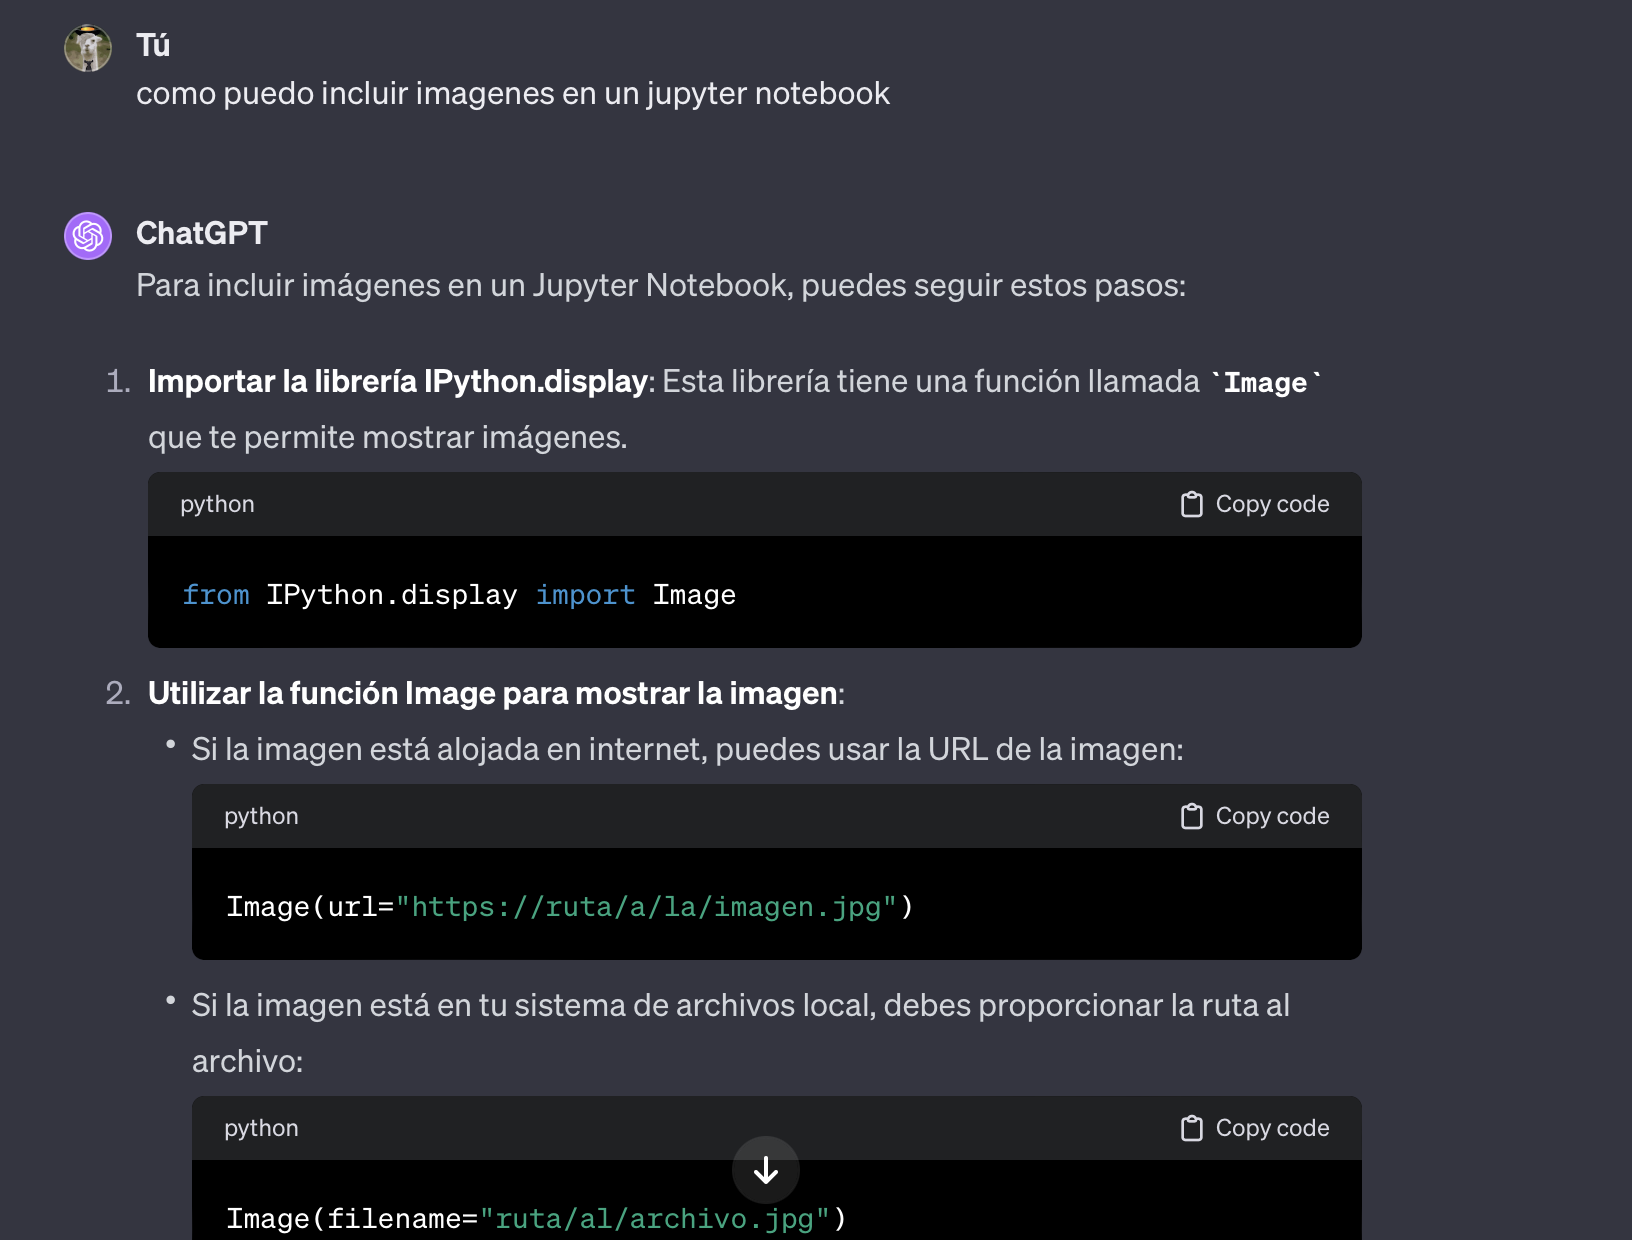

In [13]:
from IPython.display import Image

Image(filename="chatgptimages/imagesjupyter.png", width=600, height=400)

We have used chatgpt to edit our code and set timers and print the number of the iteration of the outer crossvalidation that our code is performing, in order to control the compilation of our codes:

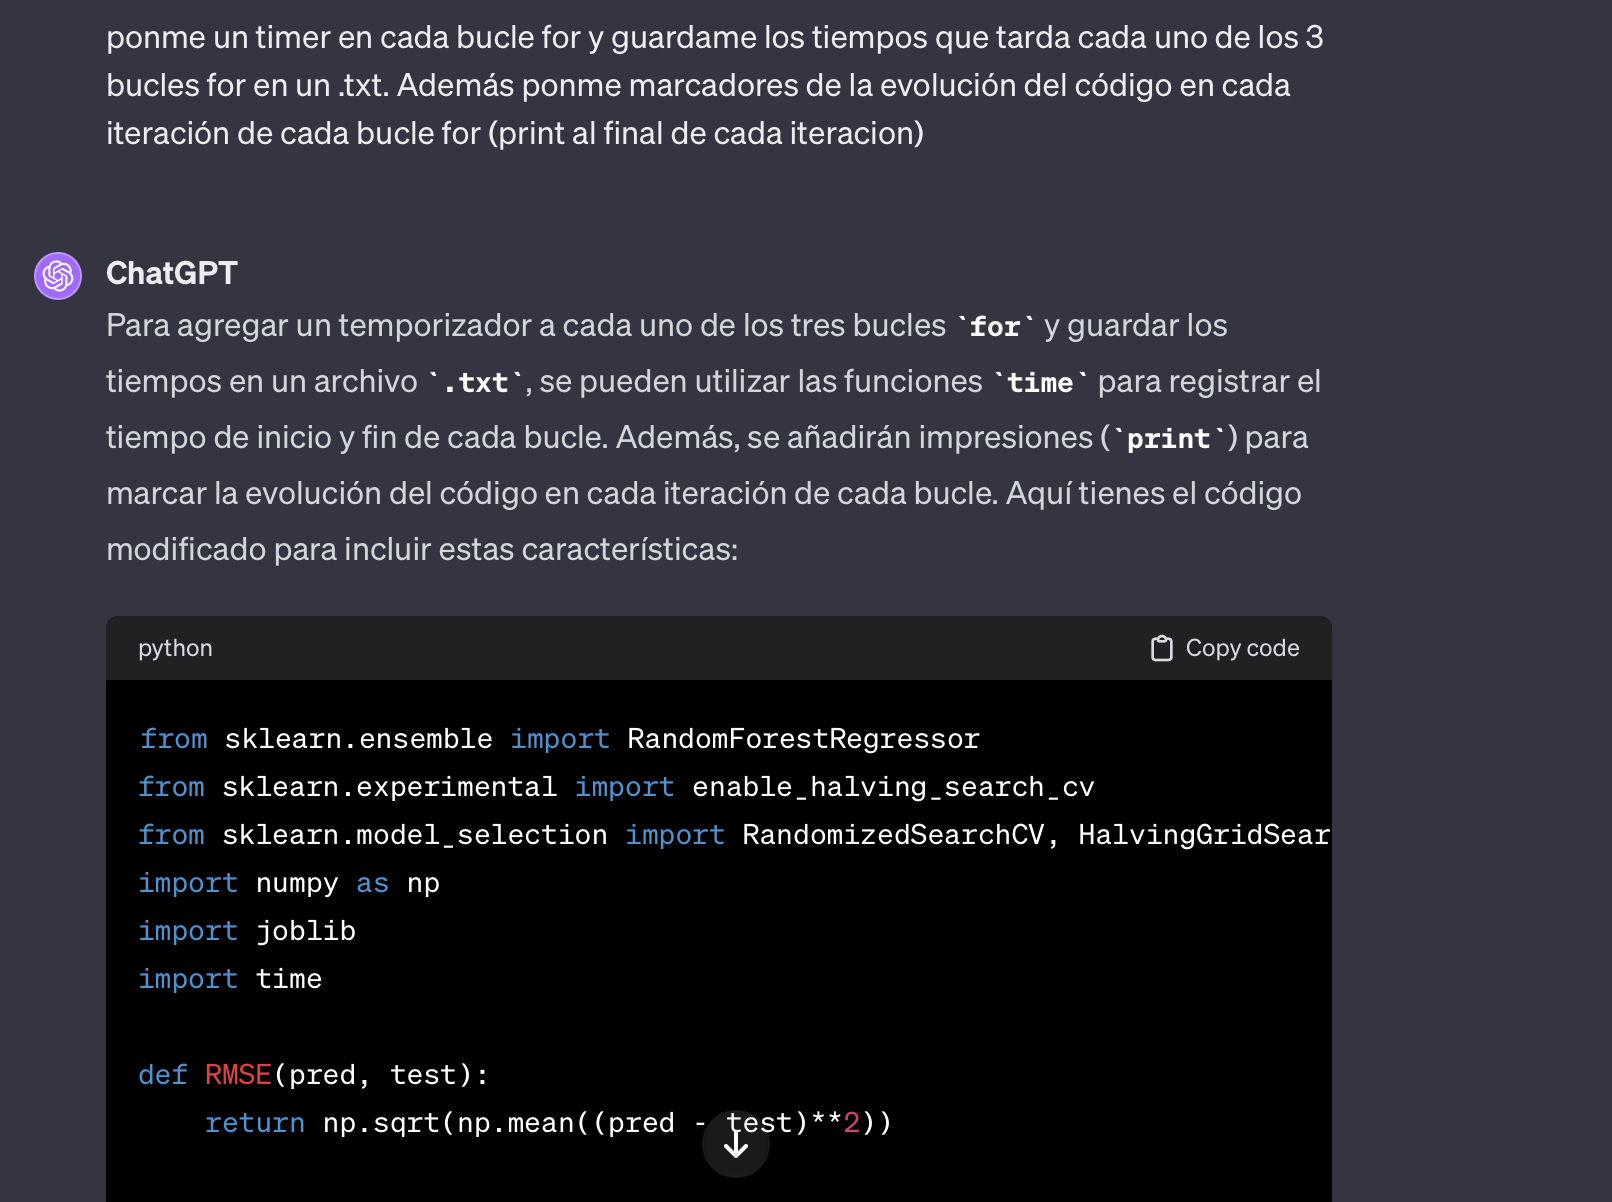

In [14]:
Image(filename="chatgptimages/codeedition1.png", width=600, height=400)

We have asked chatgpt if the range in which we planned to evaluate the random forest model was appropiate for our data or not:

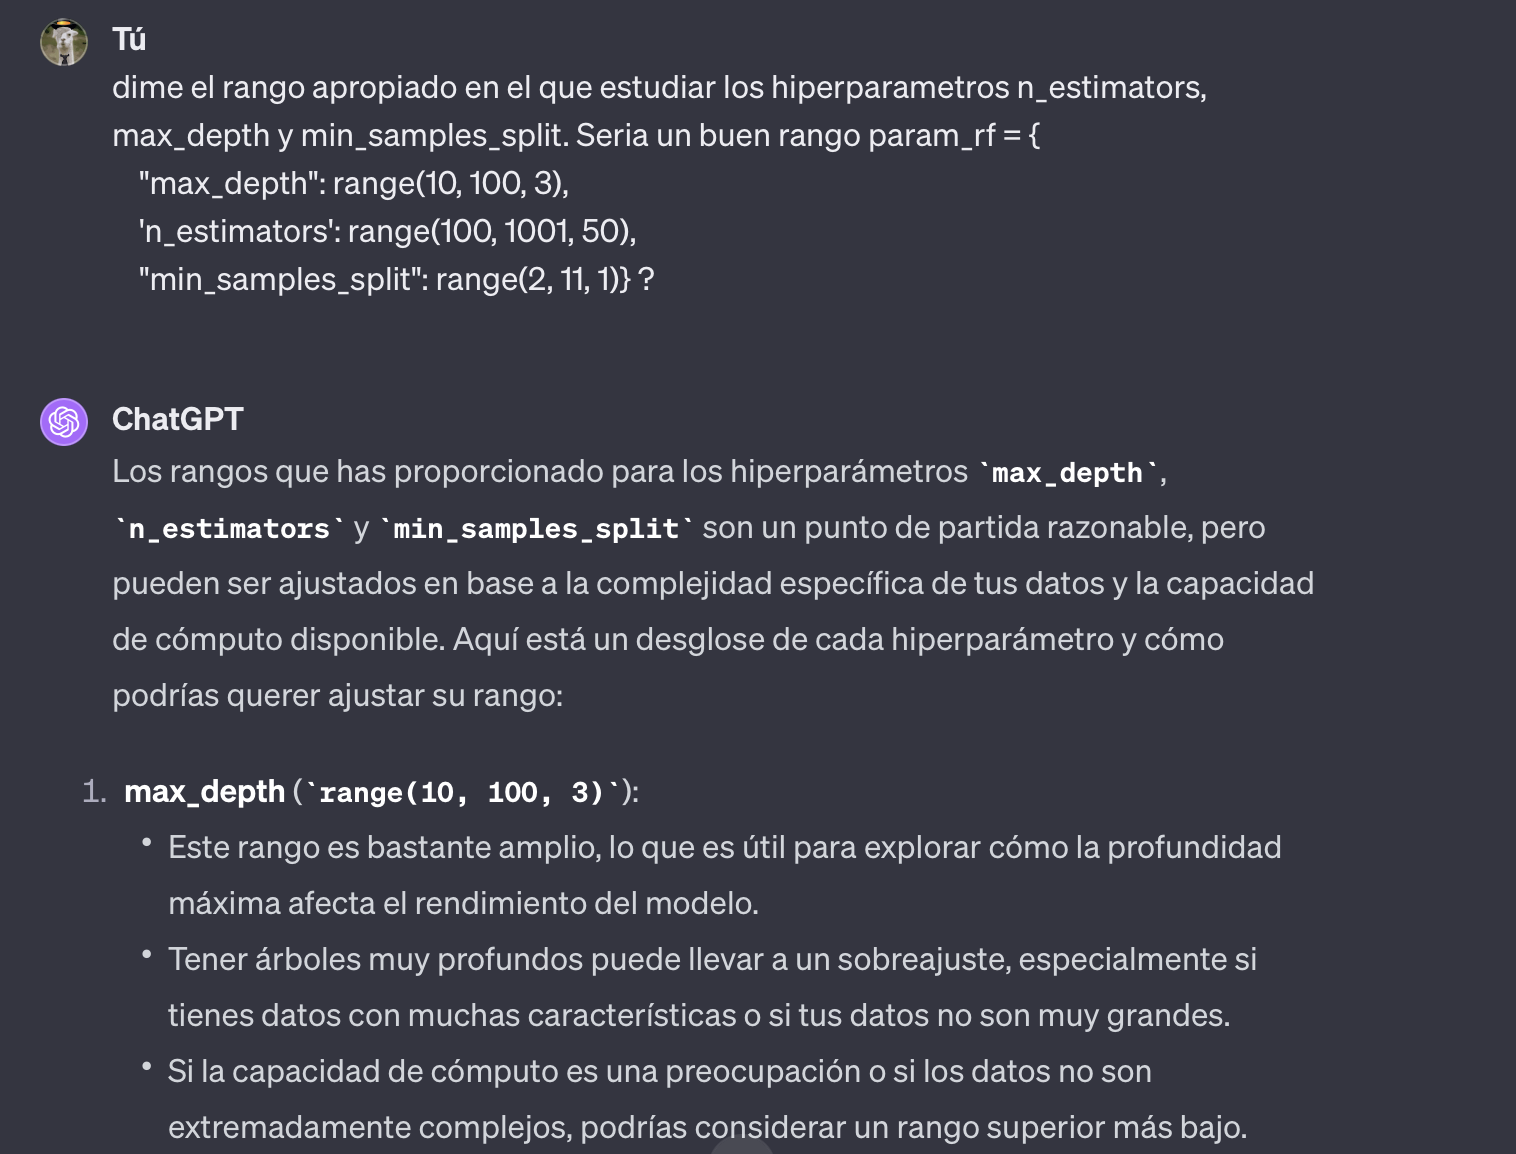

In [15]:
Image(filename="chatgptimages/hprf1.png", width=600, height=400)

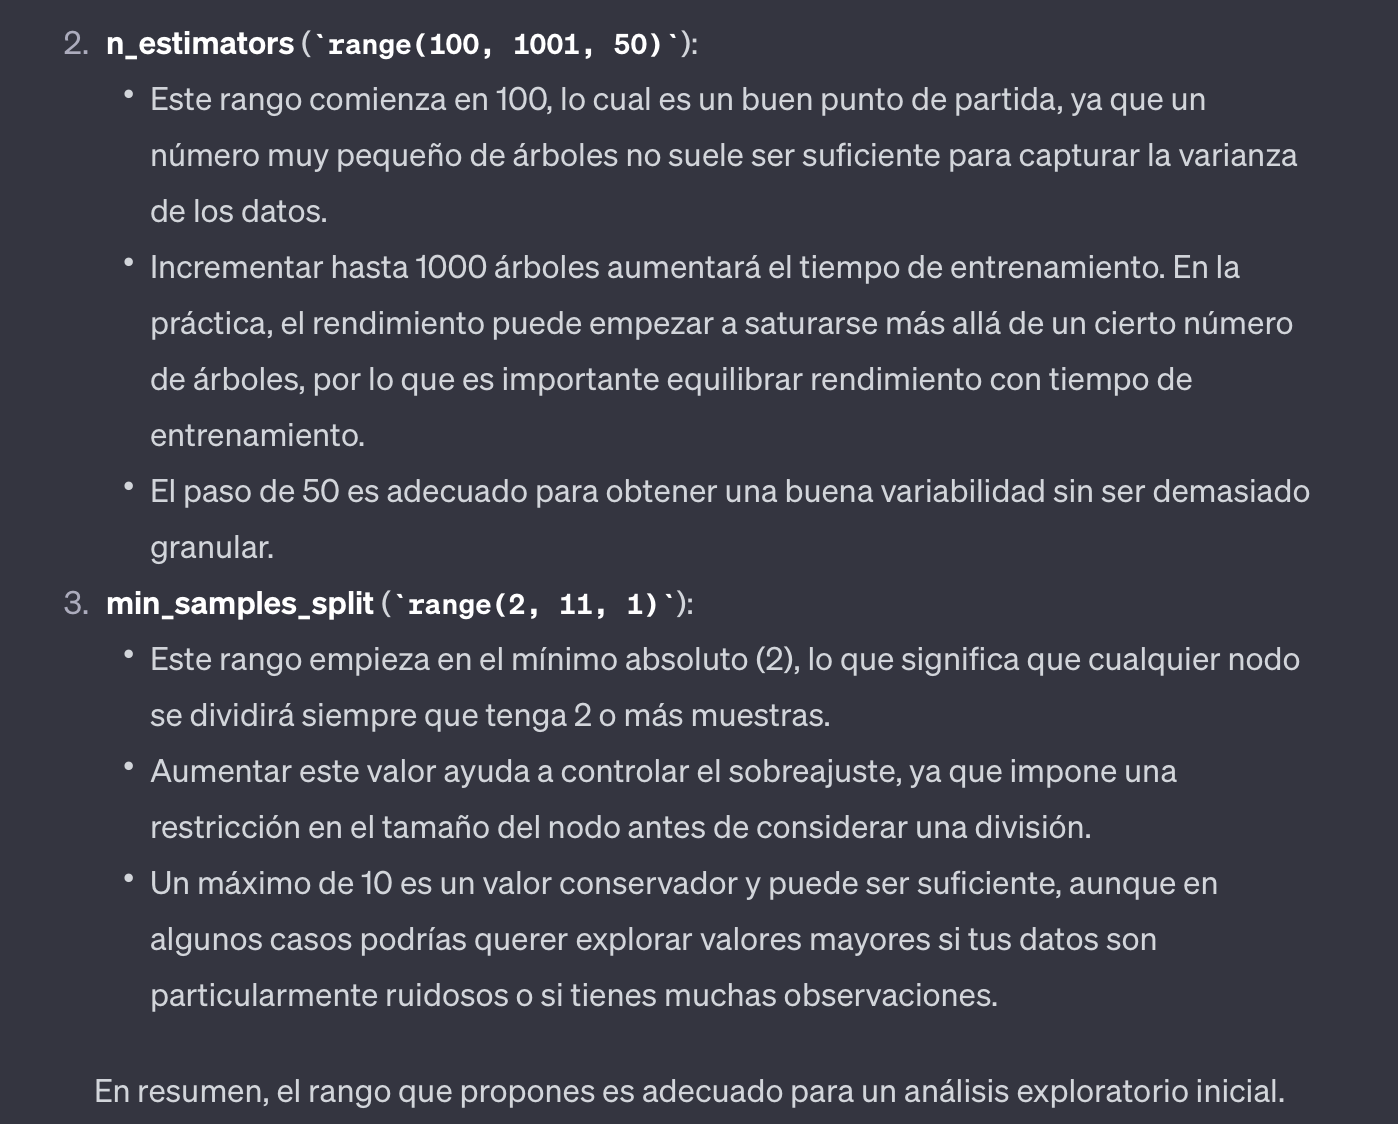

In [16]:
Image(filename="chatgptimages/hprf2.png", width=600, height=400)

However, in the end we only used this information once, to perform one iteration of the Random Search method in the Random Forest model and conclude that it was not possible to compute that level of hyperparameter tuning with that model, due to the large amount of time that it took (it did not even finish one iteration after 4 hours).

We have asked chatgpt which are the possible hyperparameters in which we can evaluate the Extra Trees model:

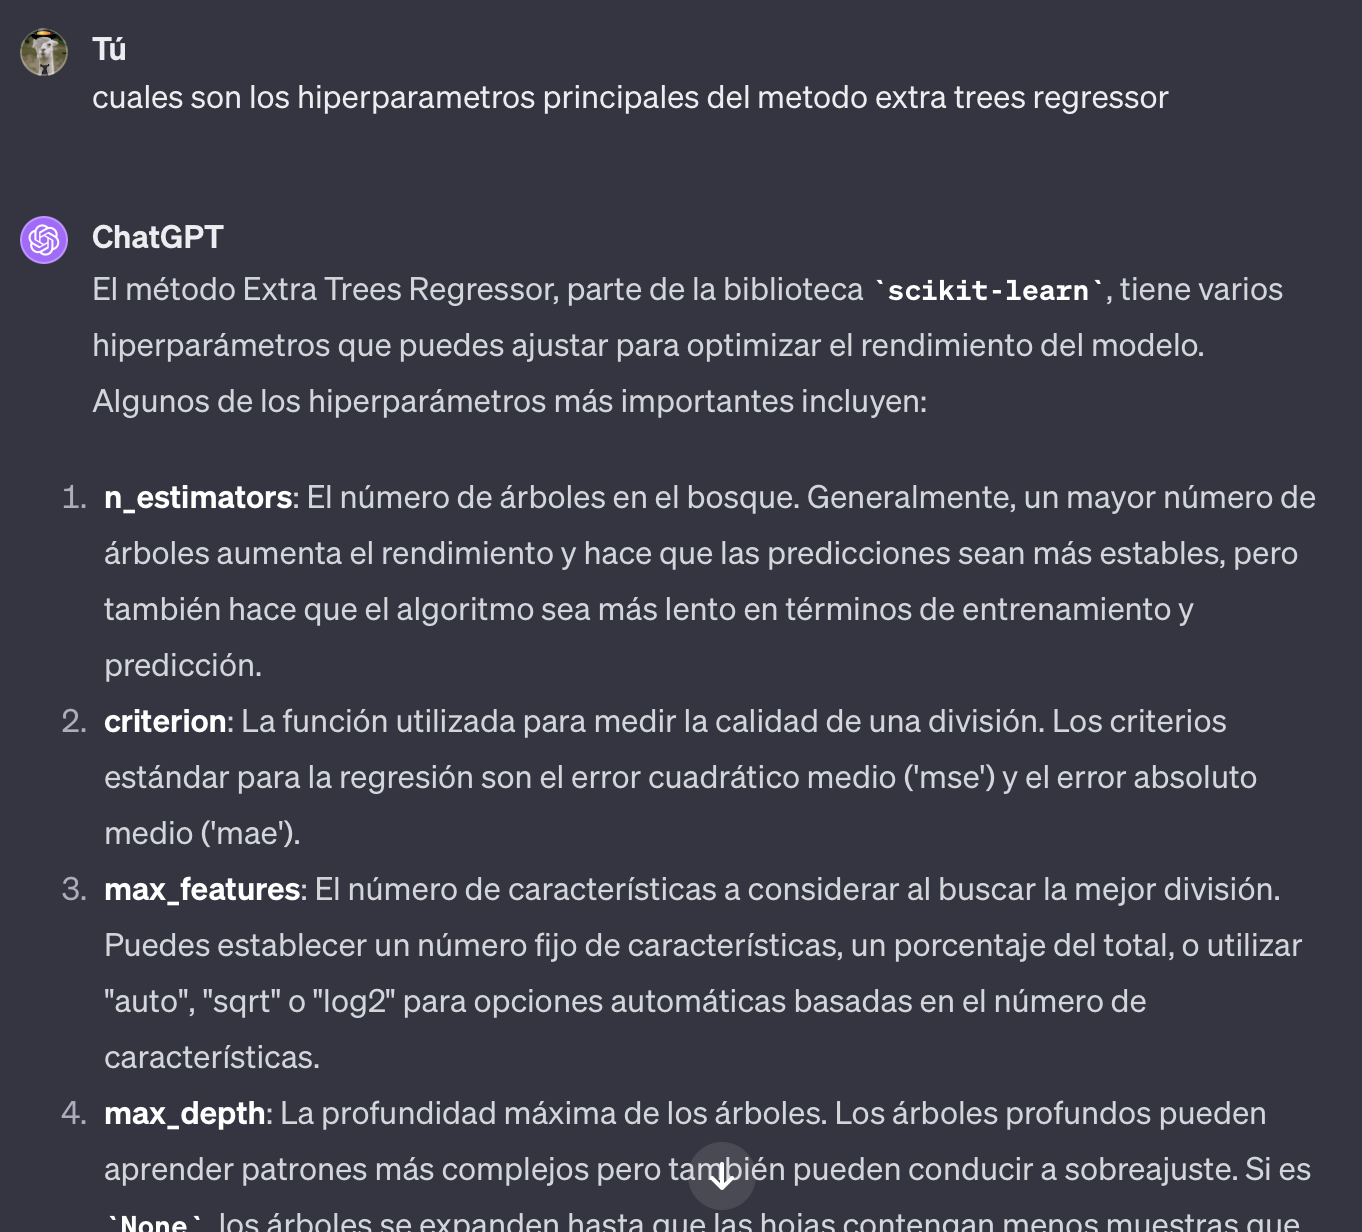

In [17]:
Image(filename="chatgptimages/hpextratrees1.png", width=600, height=400)

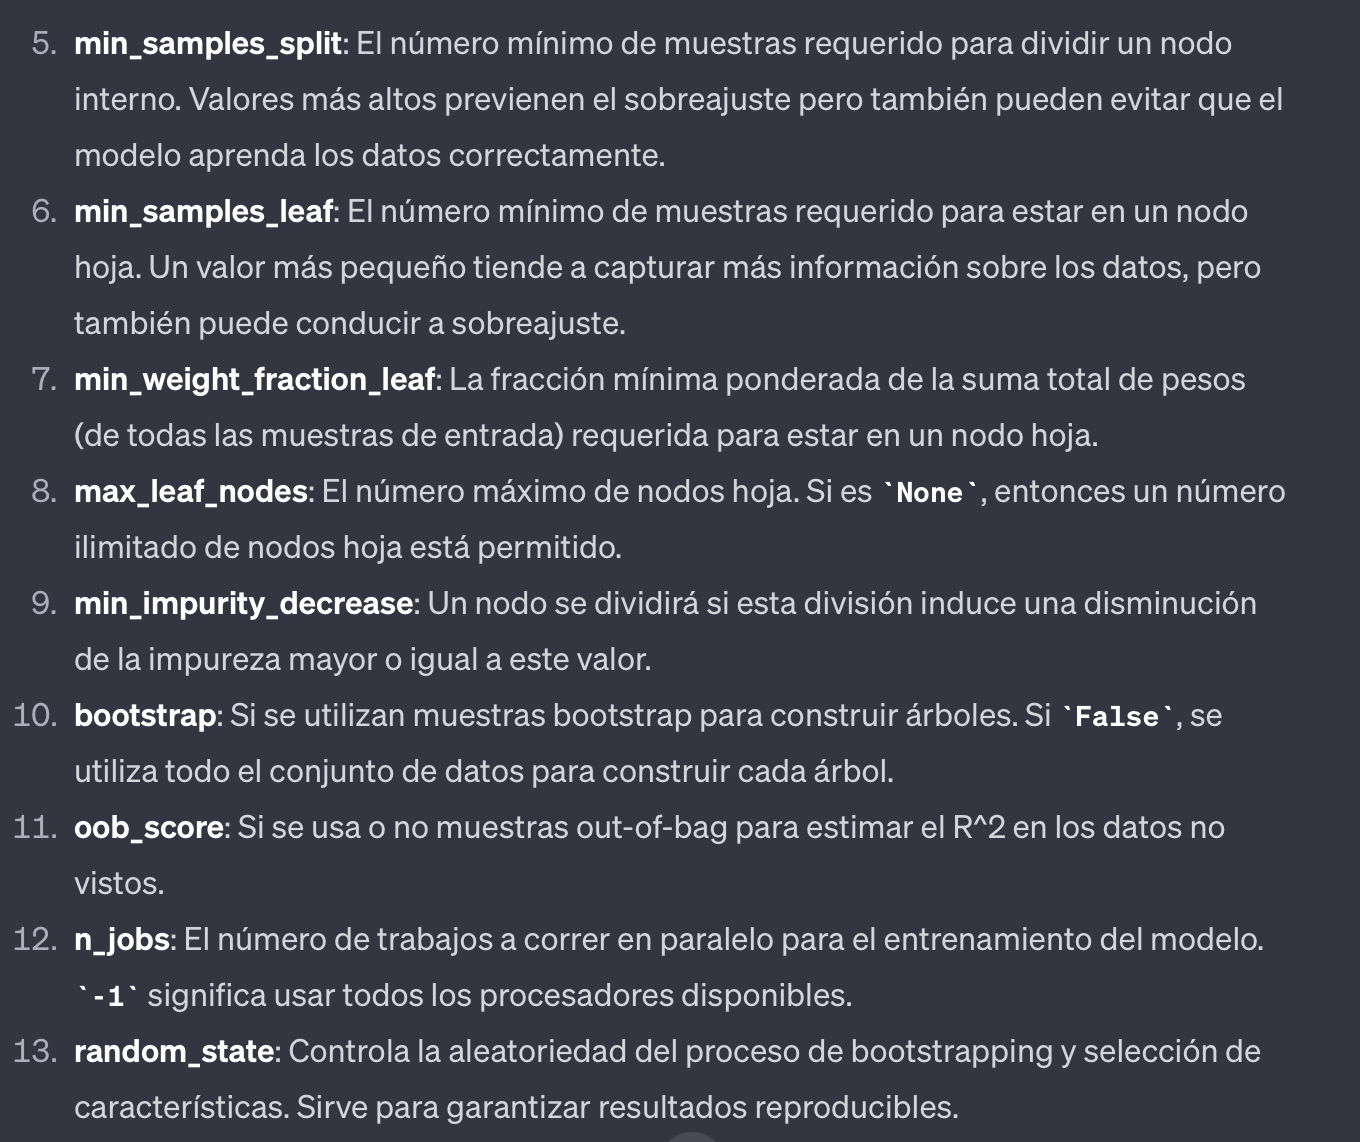

In [18]:
Image(filename="chatgptimages/hpextratrees2.png", width=600, height=400)

However, finally we opted for using the same grid of hyperparameters that we already used for the Decision Trees model, since we already had an estimation of time for that grid and it was possible to escalate the time taken once we had the default Extra Trees model.

We also used chatgpt to load the .pkl files, since we did not know how to load them to python. However, chatgpt failed in this part at first, and it did not have a great ability to correct its mistakes:

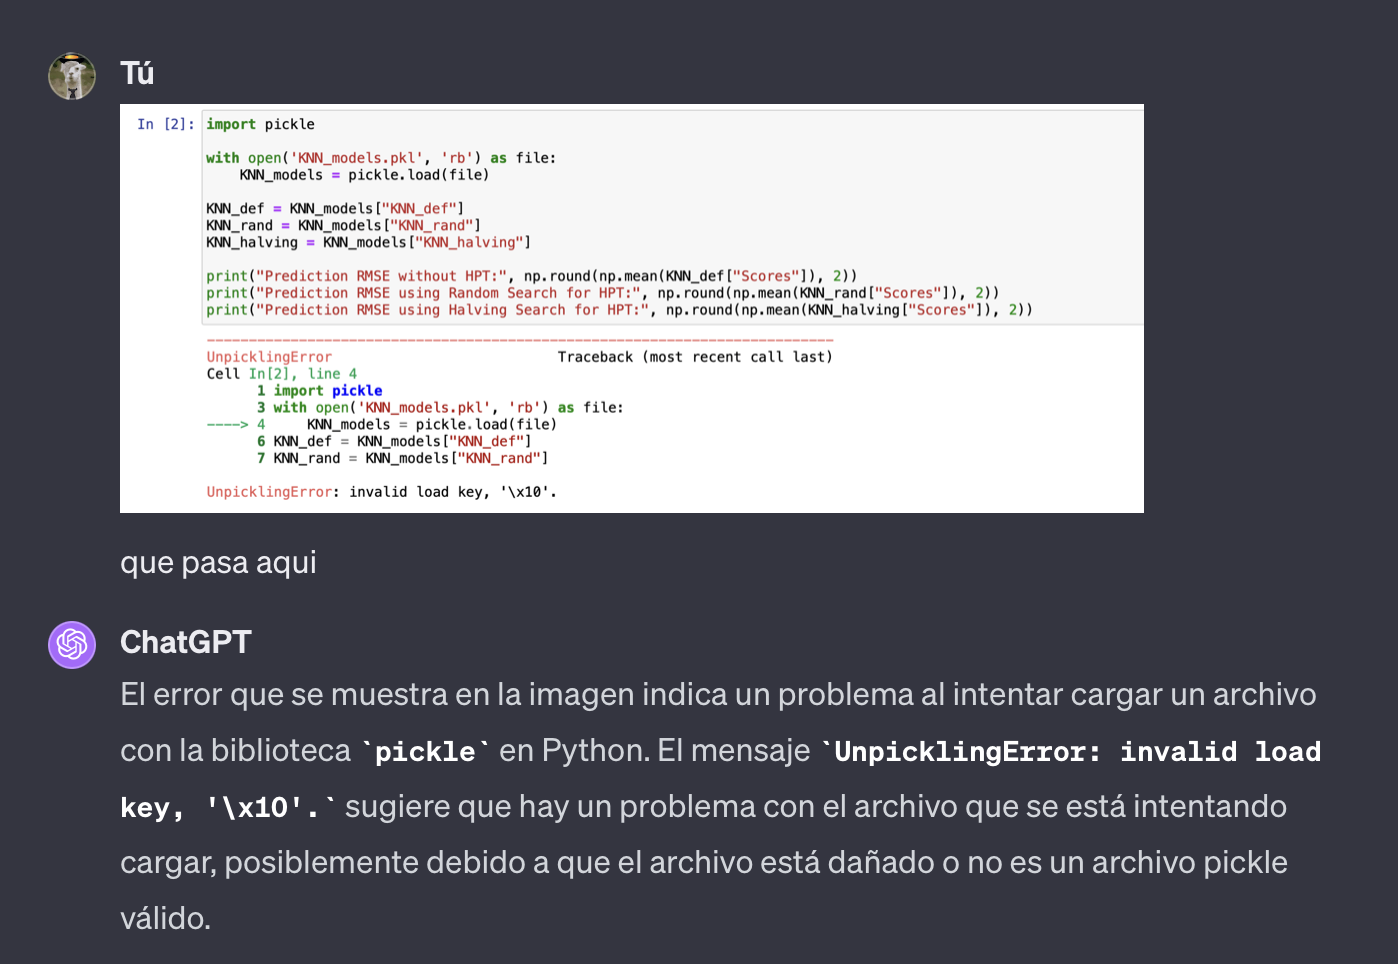

In [19]:
Image(filename="chatgptimages/pklproblem1.png", width=600, height=400)

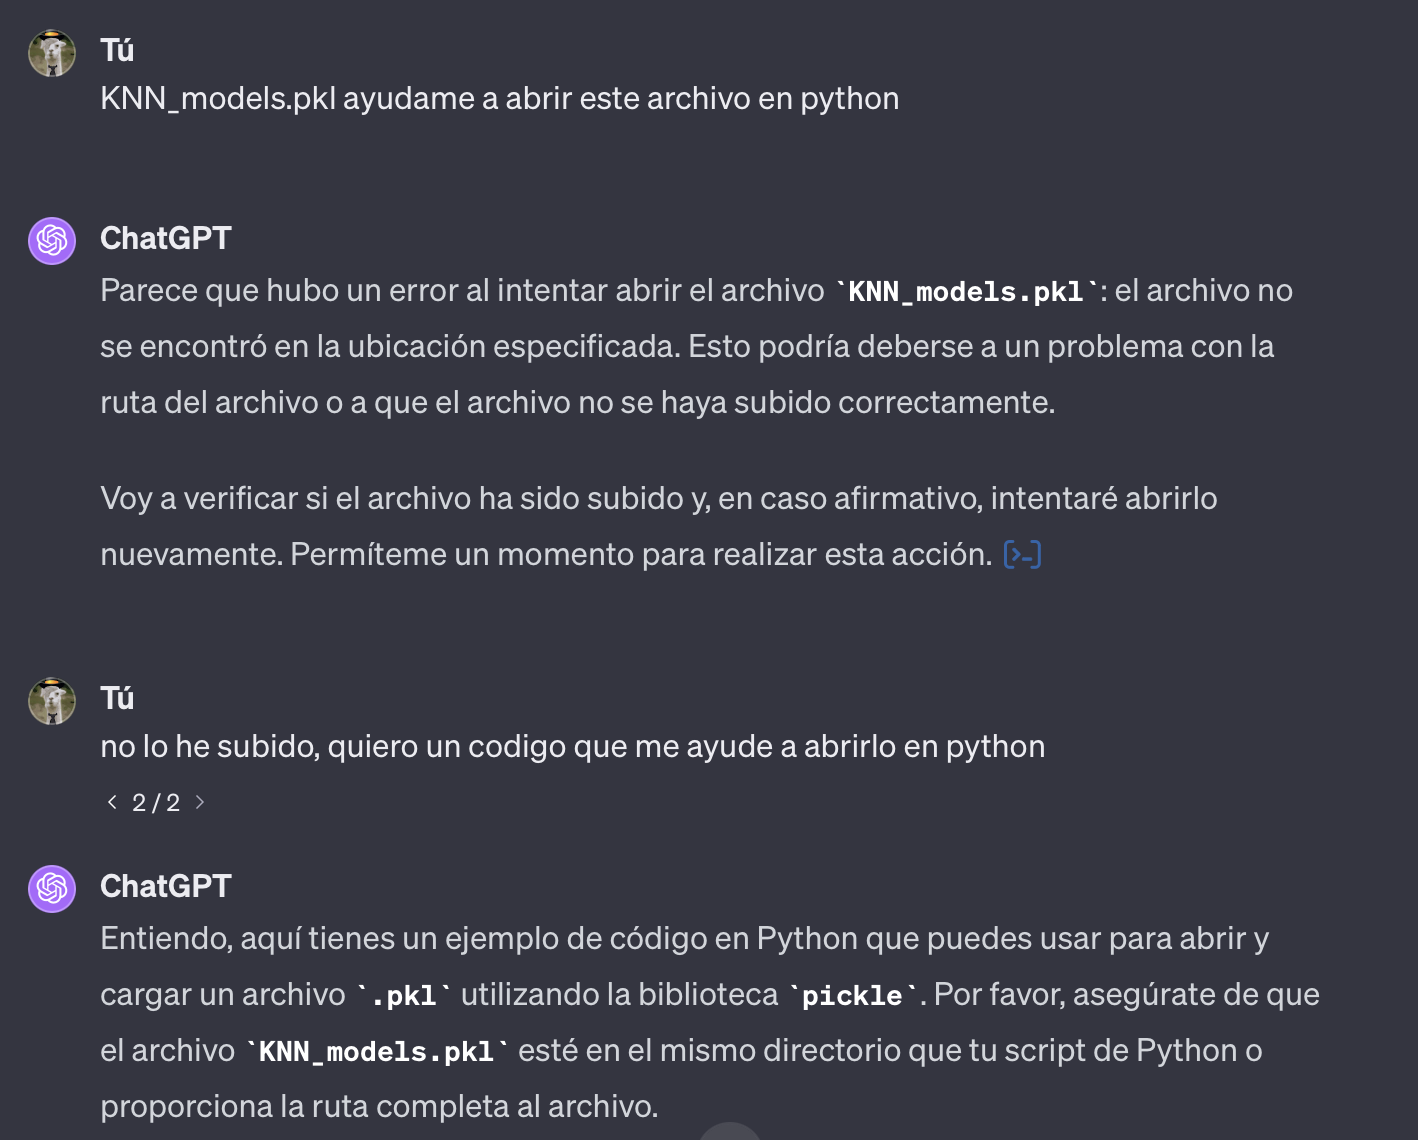

In [20]:
Image(filename="chatgptimages/pklproblem2.png", width=600, height=400)

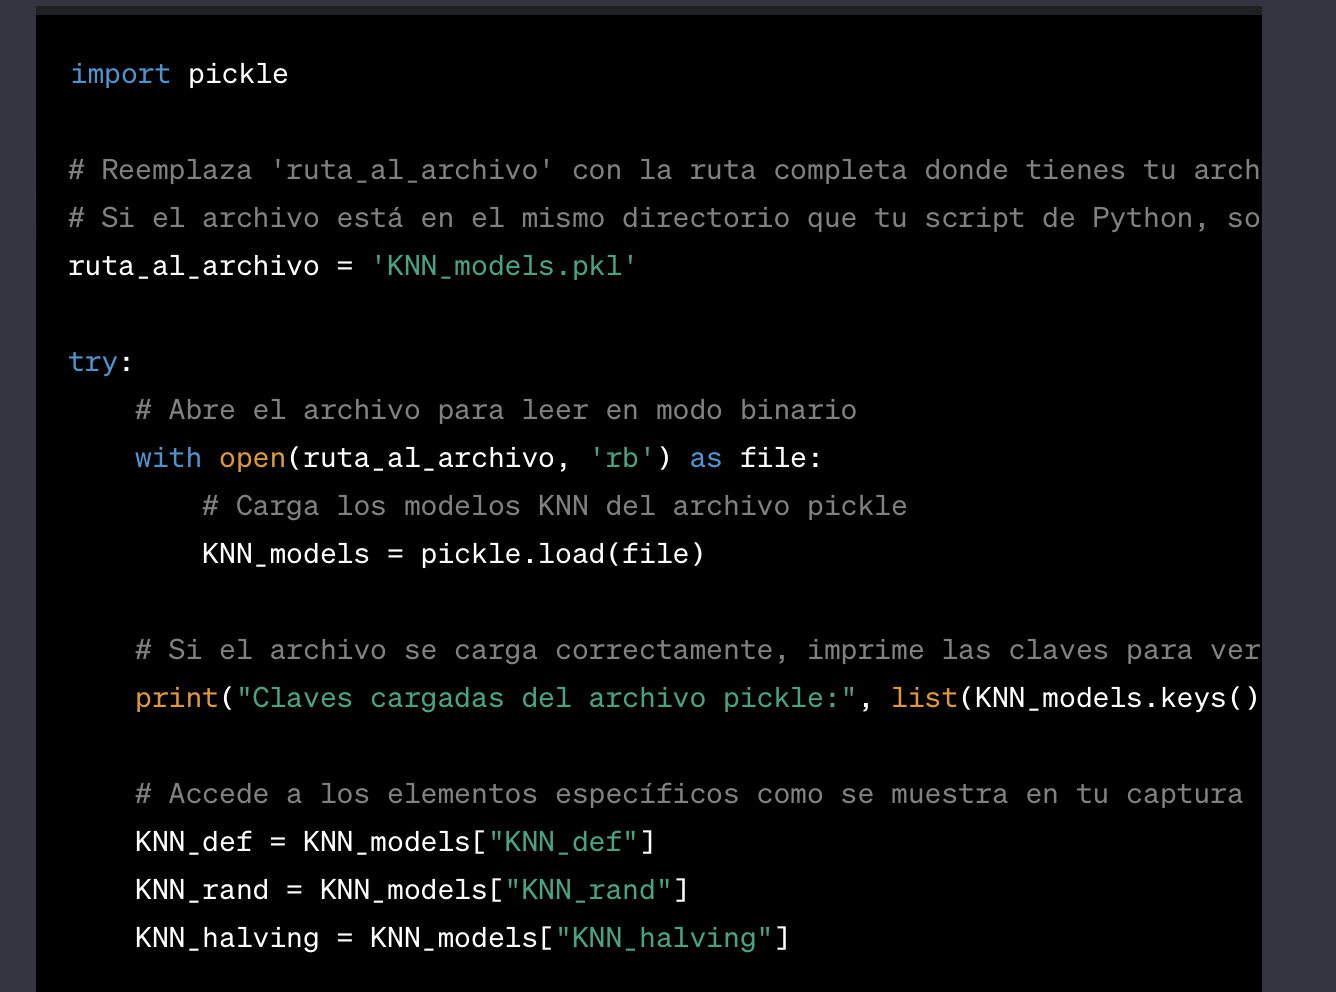

In [21]:
Image(filename="chatgptimages/pklproblem3.png", width=600, height=400)

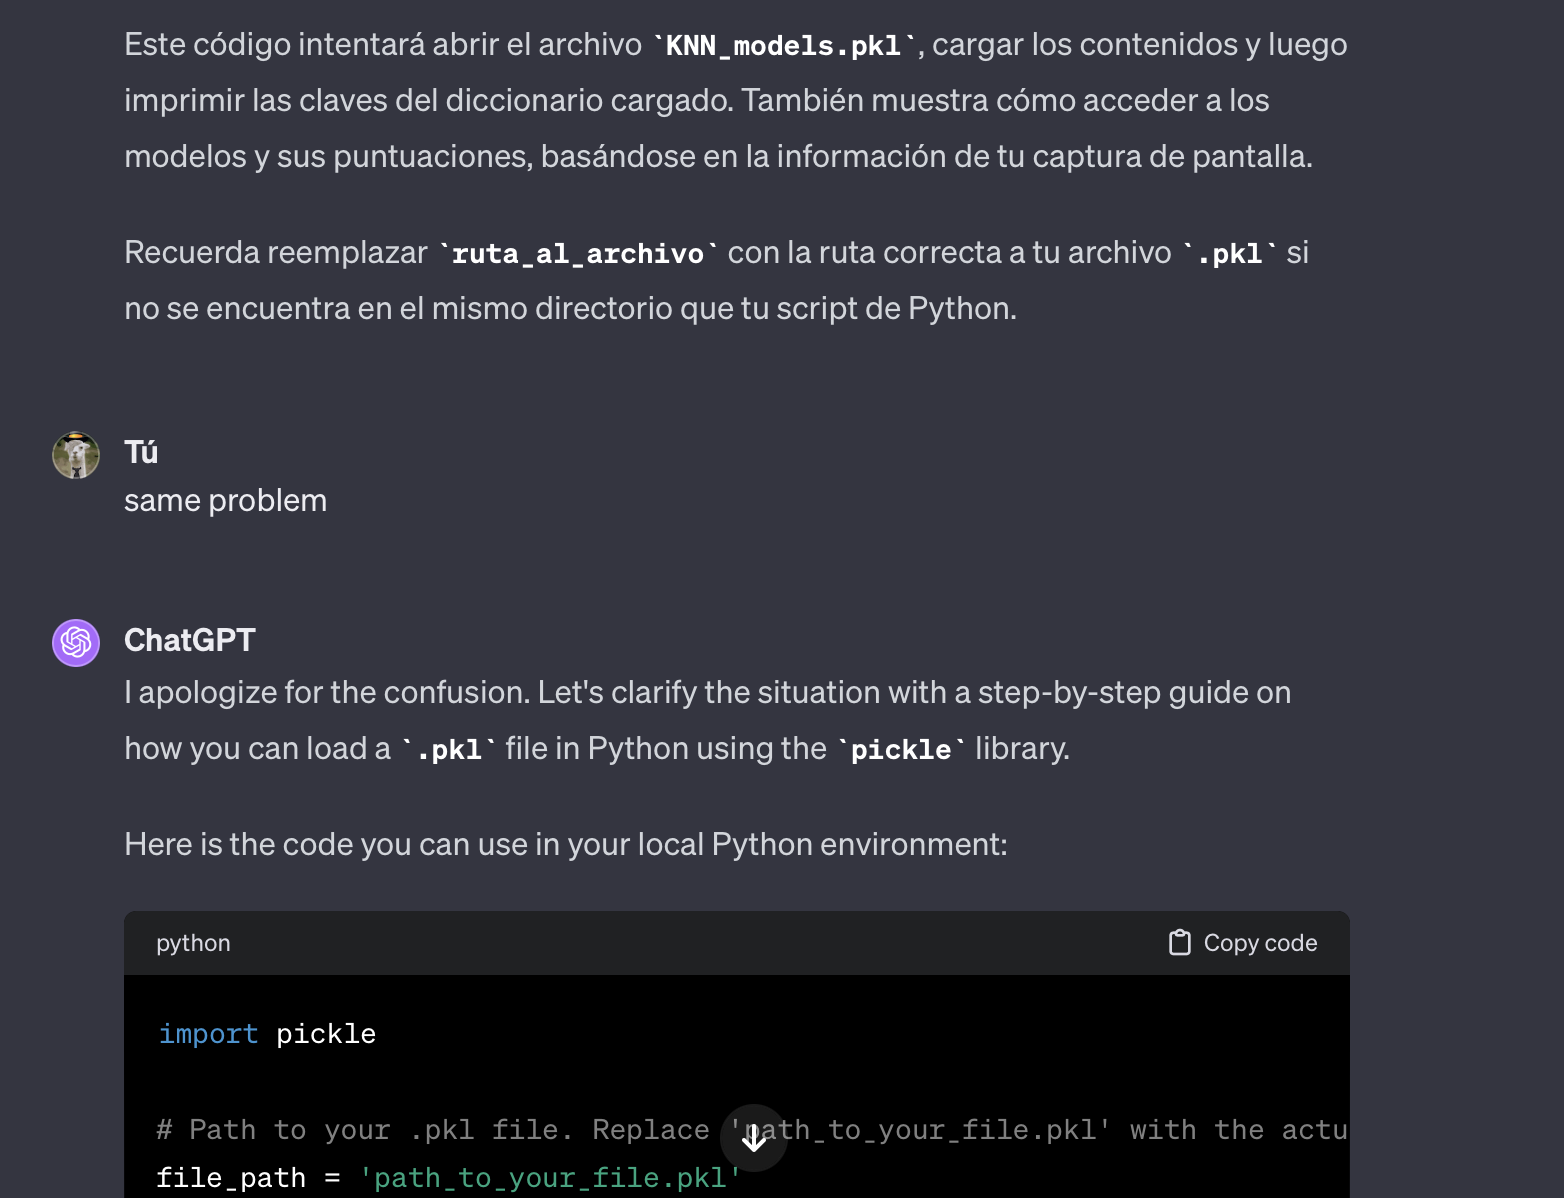

In [22]:
Image(filename="chatgptimages/pklproblem4.png", width=600, height=400)

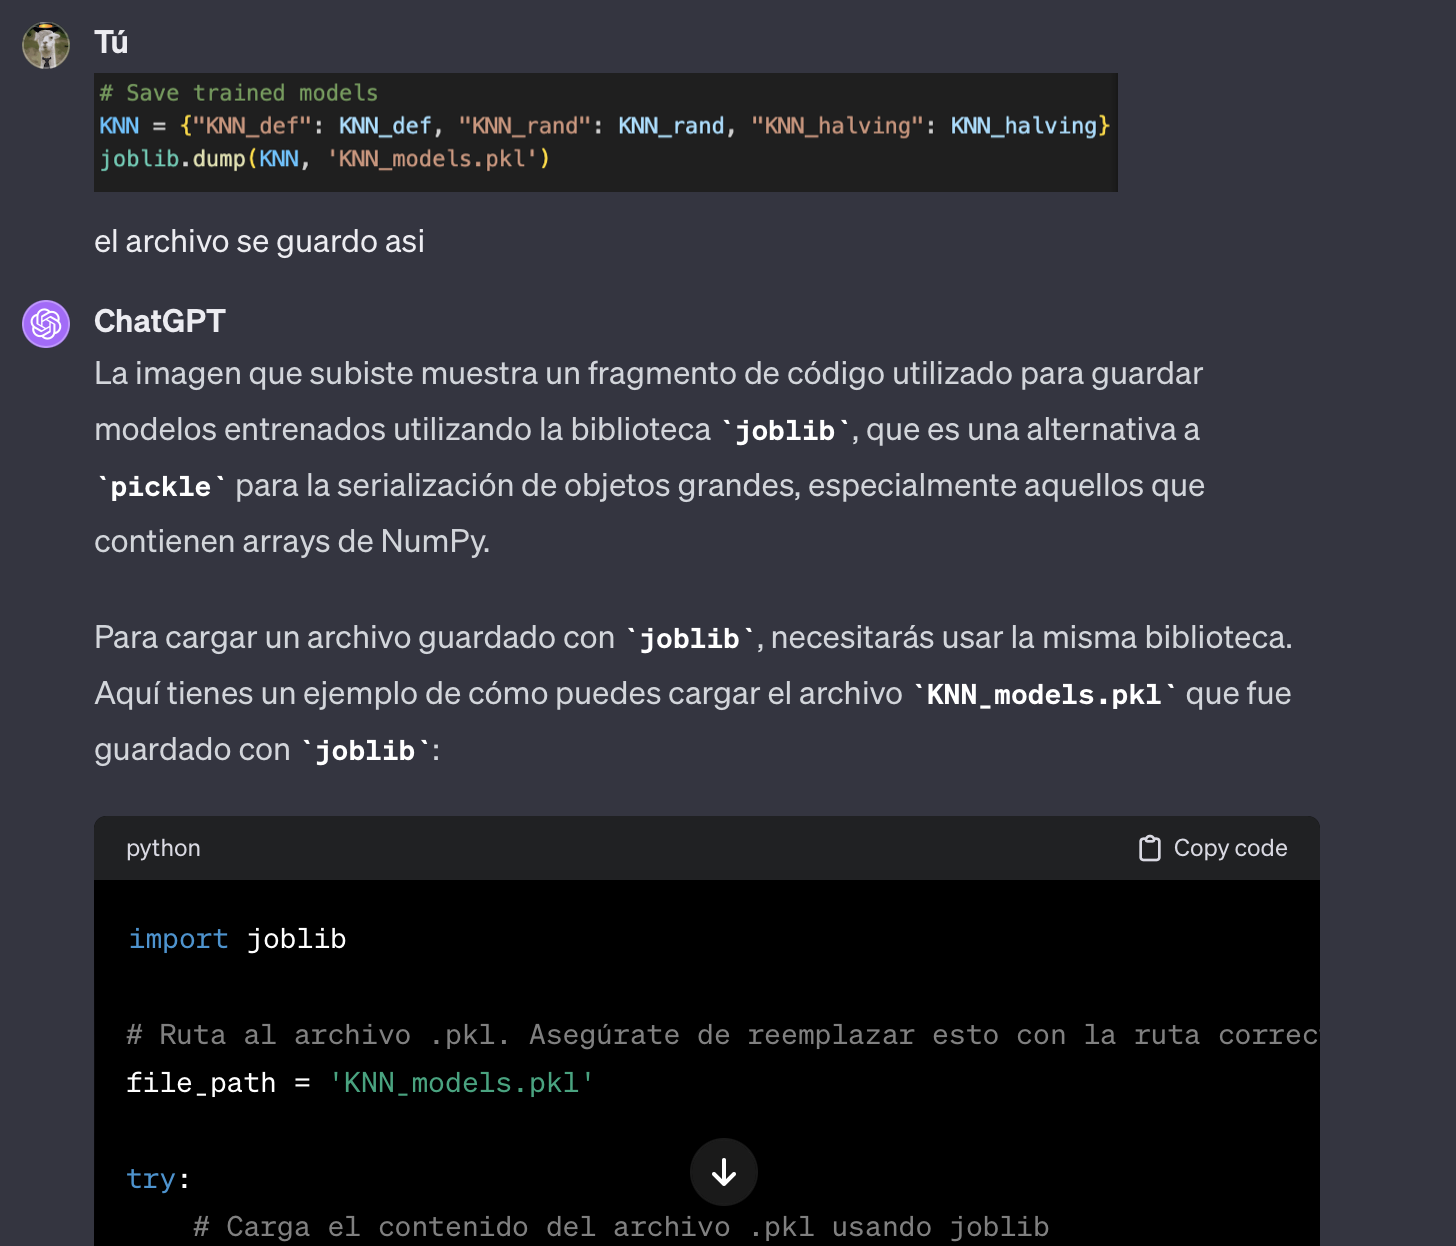

In [23]:
Image(filename="chatgptimages/pklproblem5.png", width=600, height=400)

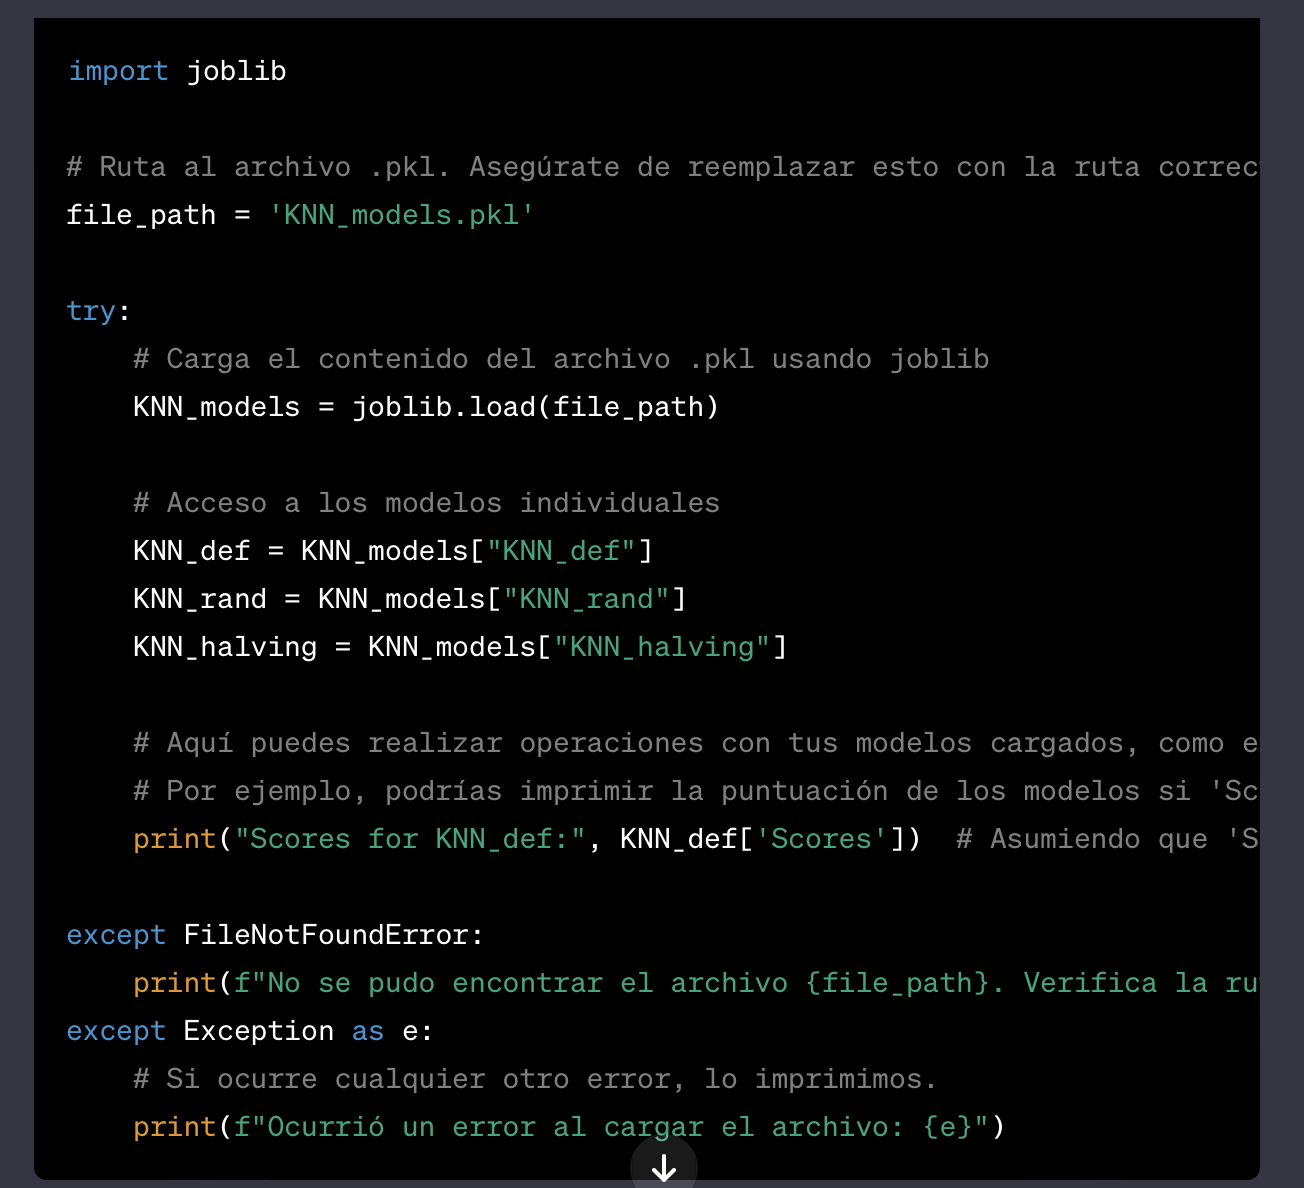

In [24]:
Image(filename="chatgptimages/pklproblem6.png", width=600, height=400)

**4. (0.6 points) Once you have decided on the best alternative (based on comparing different
alternatives using the inner evaluation):**

**a. Using the best alternative (based on inner evaluation), make an estimation of the
accuracy that the final model might get on future data (outer evaluation).**

We already performed this analysis in the section 3. f).

**b. Train the final model and use it to make predictions on the “competition data”. Save
both the final model and the competition predictions on files.**

In first place, we will load the $\texttt{wind_competition}$ dataset, and study the data that is provided and whether it contains any NA and it needs an iterative imputation.

In [30]:
test = pd.read_csv('wind_competition.csv.gzip', compression='gzip')
nrows = test.shape[0]
ncol = test.shape[1]
print('There are',nrows,'instances and',ncol,'features.')
column_names_df = pd.DataFrame(test.columns)
print(column_names_df.to_string())

There are 1189 instances and 554 features.
              0
0          year
1         month
2           day
3          hour
4     p54.162.1
5     p54.162.2
6     p54.162.3
7     p54.162.4
8     p54.162.5
9     p54.162.6
10    p54.162.7
11    p54.162.8
12    p54.162.9
13   p54.162.10
14   p54.162.11
15   p54.162.12
16   p54.162.13
17   p54.162.14
18   p54.162.15
19   p54.162.16
20   p54.162.17
21   p54.162.18
22   p54.162.19
23   p54.162.20
24   p54.162.21
25   p54.162.22
26   p54.162.23
27   p54.162.24
28   p54.162.25
29    p55.162.1
30    p55.162.2
31    p55.162.3
32    p55.162.4
33    p55.162.5
34    p55.162.6
35    p55.162.7
36    p55.162.8
37    p55.162.9
38   p55.162.10
39   p55.162.11
40   p55.162.12
41   p55.162.13
42   p55.162.14
43   p55.162.15
44   p55.162.16
45   p55.162.17
46   p55.162.18
47   p55.162.19
48   p55.162.20
49   p55.162.21
50   p55.162.22
51   p55.162.23
52   p55.162.24
53   p55.162.25
54       cape.1
55       cape.2
56       cape.3
57       cape.4
58       cape

In [27]:
test.head()

year  month  day  hour     p54.162.1     p54.162.2     p54.162.3  \
0  2010      1    1     0  2.403131e+06  2.395445e+06  2.387755e+06   
1  2010      1    1     6  2.410306e+06  2.402394e+06           NaN   
2  2010      1    1    12  2.434908e+06  2.426793e+06  2.418683e+06   
3  2010      1    1    18  2.447112e+06           NaN  2.431027e+06   
4  2010      1    2     0  2.459695e+06           NaN  2.443809e+06   

      p54.162.4     p54.162.5     p54.162.6  ...   v100.16   v100.17  \
0  2.380065e+06  2.372380e+06  2.399548e+06  ...  7.212586  7.057422   
1  2.386571e+06  2.378660e+06           NaN  ...  0.207289  0.583972   
2  2.410573e+06  2.402462e+06  2.431465e+06  ...  1.670114  1.691568   
3  2.422984e+06  2.414942e+06  2.443696e+06  ...  1.217597  1.278464   
4  2.435866e+06           NaN  2.456252e+06  ...  3.755089  3.686738   

    v100.18   v100.19   v100.20   v100.21   v100.22   v100.23   v100.24  \
0  6.901760       NaN  6.591434  7.184147  7.030980  6.877313  6.723647   
1       NaN       NaN  1.714518  0.345988  0.723170  1.100850  1.478031   
2  1.712522  1.733976       NaN  1.664127  1.682587  1.700548       NaN   
3  1.339332  1.399701  1.460569  1.215102  1.272477  1.329853       NaN   
4       NaN  3.549536  3.481184  3.781532  3.710686       NaN  3.569492   

    v100.25  
0  6.570479  
1  1.855712  
2  1.736470  
3  1.444105  
4  3.498646  

[5 rows x 554 columns]

In [55]:
print(test["year"].unique())

[2010]


As we can easily observe, the test dataset contains all the features that the wind_ava dataset contained, including the dates, and it only lacks the objective column, the energy data, that we have to guess. The dataset contains observations of the year 2010 only. Now we study whether there are any NA in this dataset:

In [28]:
missing_values_count = test.isnull().sum()

# Filtrar las columnas que tienen al menos un valor nulo
missing_values_columns = missing_values_count[missing_values_count > 0]

# Imprimir las características con valores faltantes y cuántos tienen
print(missing_values_columns)

p54.162.1     99
p54.162.2    113
p54.162.3     71
p54.162.4     68
p54.162.5    138
            ... 
v100.21       65
v100.22      107
v100.23      147
v100.24      152
v100.25      119
Length: 550, dtype: int64


As in the previous dataset, we find NA values in all of the attributes, except for the dates. Hence, we perform an iterative imputation on these data:

In [ ]:
X_test=test.iloc[:,4:]
imputer = enable_iterative_imputer.IterativeImputer(random_state = 100512068)
X_test = imputer.fit_transform(X_test)
np.savetxt('X_test.txt', X_test)

In [35]:
X_test=np.loadtxt('X_test.txt')

Using as X_train and y_train the whole $\texttt{wind_ava}$ dataset (with the iterative imputation that we already computed for the dataset), we have trained all of the final models that we will use to train the stacking final model. To this end, we have compiled the files $\texttt{finalmodelknn.py}$, $\texttt{finalmodeltrees.py}$, $\texttt{finalmodelrf.py}$, $\texttt{finalmodelgb.py}$ and $\texttt{finalmodelextra.py}$, where we have computed the chosen hyperparameter tuning version for each method (the default method for the extra trees, random forest and gradient boosting models and the random search method with the corresponding hyperparameters for the knn and decision trees models). The computed final models have been saved in the files $\texttt{FinalModelKnn.pkl}$, $\texttt{FinalModelTrees.pkl}$, $\texttt{FinalModelGb.pkl}$, $\texttt{FinalModelRf.pkl}$ and $\texttt{FinalModelExtra.pkl}$. All of these files are saved in the $\texttt{finalmodels}$ folder.

Using all of these models, we have finally computed the stacking final model using the file $\texttt{finalmodelstacking.py}$ and saving the model in $\texttt{FinalModel.pkl}$. The stacking final model has taken 1095 s to be compiled, in addition to the computation time of all of the other models, which sums up to about 500 s. While computing the final model we have also computed the predictions to the $\texttt{wind_competition}$ dataset, for which we have used the imputed X_test matrix, and we have saved them in the file $\texttt{FinalPredictions.txt}$.

We will now perform a small analysis on the predictions.

In [40]:
finalpreds=np.loadtxt('finalmodels/FinalPredictions.txt')

In [52]:
print('The mean of the final predictions is',np.round(np.mean(finalpreds),2),'.')

The mean of the final predictions is 668.02 .


This mean is not too far away form the mean of our training data, which was 693.1. This may indicate consistency in the predictions. However, it is lower.

We will now plot the energy predictions with respect to the number of the observations to observe the evolution of the energy during the year 2010. In order to understand better the graph, we have used as labels the month corresponding to each instance, but it must be noted that we have not plotted energy vs month.

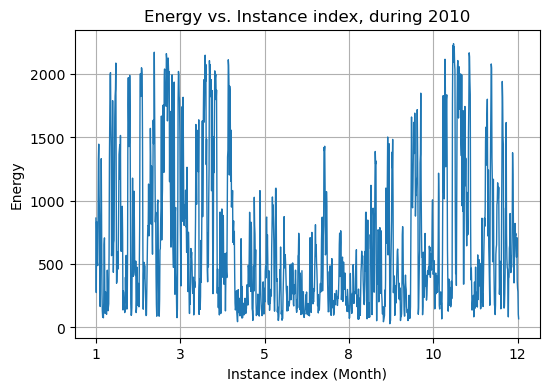

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'FinalPreds': finalpreds,  
    'Month': test['month']     
})

plt.figure(figsize=(6, 4))
plt.plot(df.index, df['FinalPreds'], marker=None, linewidth=1)

xticks_positions = [i for i in range(0, len(df['Month']), len(df['Month']) // 5)]  
xticks_labels = [df['Month'][i] for i in xticks_positions] 
plt.xticks(xticks_positions, xticks_labels)

plt.xlabel('Instance index (Month)')
plt.ylabel('Energy')
plt.title('Energy vs. Instance index, during 2010')
plt.grid(True)
plt.show()

The graph shows exactly the monthly evolution of eolic energy that we would expect: more wind during the fall and spring, a little less during winter and much less during the summer.